<Html>
    <body>
        <h1>Stock Market Prediction</h1>
        <h2>Stock Market Data From Yahoo Finance</h2><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surety about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [4]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [132]:
MSFT.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-02-05   93.239998   88.000000   90.559998   88.000000  51031500.0   
2018-02-06   91.480003   85.250000   86.889999   91.330002  67998600.0   
2018-02-07   91.769997   89.199997   90.489998   89.610001  41107600.0   
2018-02-08   89.879997   84.760002   89.709999   85.010002  55628700.0   
2018-02-09   88.930000   83.830002   86.300003   88.180000  63499100.0   
2018-02-12   89.779999   87.930000   88.739998   89.129997  35720300.0   
2018-02-13   90.000000   87.800003   88.930000   89.830002  26407700.0   
2018-02-14   90.989998   88.410004   88.510002   90.809998  34960900.0   
2018-02-15   92.720001   90.620003   91.209999   92.660004  27823900.0   
2018-02-16   93.500000   91.800003   92.449997   92.000000  30596900.0   
2018-02-20   93.059998   91.010002   91.480003   92.720001  30911700.0   
2018-02-21   93.360001   91.489998   92.980003   91.489998  26922500.0   
2018-02-22   92.730003   91.360001   92.050003   91.730003  24392800.0   
2018-02-23   94.070000   92.360001   93.599998   94.059998  26329200.0   
2018-02-26   95.449997   94.250000   94.400002   95.419998  30199800.0   
2018-02-27   95.839996   94.199997   95.739998   94.199997  25869100.0   
2018-02-28   95.709999   93.629997   94.839996   93.769997  31167300.0   
2018-03-01   94.570000   91.839996   93.989998   92.849998  37135600.0   
2018-03-02   93.150002   90.860001   91.580002   93.050003  32830400.0   
2018-03-05   94.269997   92.260002   92.339996   93.639999  23901600.0   
2018-03-06   94.489998   92.940002   94.339996   93.320000  22175800.0   
2018-03-07   93.940002   92.430000   93.160004   93.860001  26716100.0   
2018-03-08   95.099998   93.769997   94.269997   94.430000  25887800.0   
2018-03-09   96.540001   95.000000   95.290001   96.540001  36937300.0   
2018-03-12   97.209999   96.040001   96.500000   96.769997  26073700.0   
2018-03-13   97.239998   93.970001   97.000000   94.410004  35387800.0   
2018-03-14   95.410004   93.500000   95.120003   93.849998  32132000.0   
2018-03-15   94.580002   92.830002   93.529999   94.180000  27611000.0   
2018-03-16   95.379997   93.919998   94.680000   94.599998  49081300.0   
2018-03-19   93.900002   92.110001   93.739998   92.889999  33344100.0   
...                ...         ...         ...         ...         ...   
2018-05-16   97.400002   96.620003   97.360001   97.150002  17384700.0   
2018-05-17   97.540001   95.830002   96.760002   96.180000  17246700.0   
2018-05-18   96.930000   96.010002   96.010002   96.360001  17865800.0   
2018-05-21   98.010002   96.800003   97.000000   97.599998  19422500.0   
2018-05-22   98.169998   97.199997   97.680000   97.500000  15441200.0   
2018-05-23   98.730003   96.320000   96.709999   98.660004  21114800.0   
2018-05-24   98.940002   96.809998   98.730003   98.309998  26649300.0   
2018-05-25   98.980003   97.860001   98.300003   98.360001  18363900.0   
2018-05-29   98.879997   97.230003   97.839996   98.010002  28671000.0   
2018-05-30   99.250000   97.910004   98.309998   98.949997  22158500.0   
2018-05-31   99.989998   98.610001   99.290001   98.839996  34140900.0   
2018-06-01  100.860001   99.169998   99.279999  100.790001  28655600.0   
2018-06-04  101.860001  100.849998  101.260002  101.669998  27281600.0   
2018-06-05  102.330002  101.529999  102.000000  102.190002  23514400.0   
2018-06-06  102.599998  101.900002  102.480003  102.489998  21122900.0   
2018-06-07  102.690002  100.379997  102.650002  100.879997  28232200.0   
2018-06-08  101.949997  100.540001  101.089996  101.629997  22165100.0   
2018-06-11  101.589996  100.669998  101.010002  101.050003  23490900.0   
2018-06-12  101.449997  100.750000  101.099998  101.309998  18325200.0   
2018-06-13  102.010002  100.559998  101.720001  100.849998  29492900.0   
2018-06-14  102.029999  101.000000  101.650002  101.419998  25691800.0   
2018-06-15  101.529999

In [6]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
MSFT['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
MSFT['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
MSFT['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
MSFT['Adj Close'].plot(legend=True, figsize=(10,4))

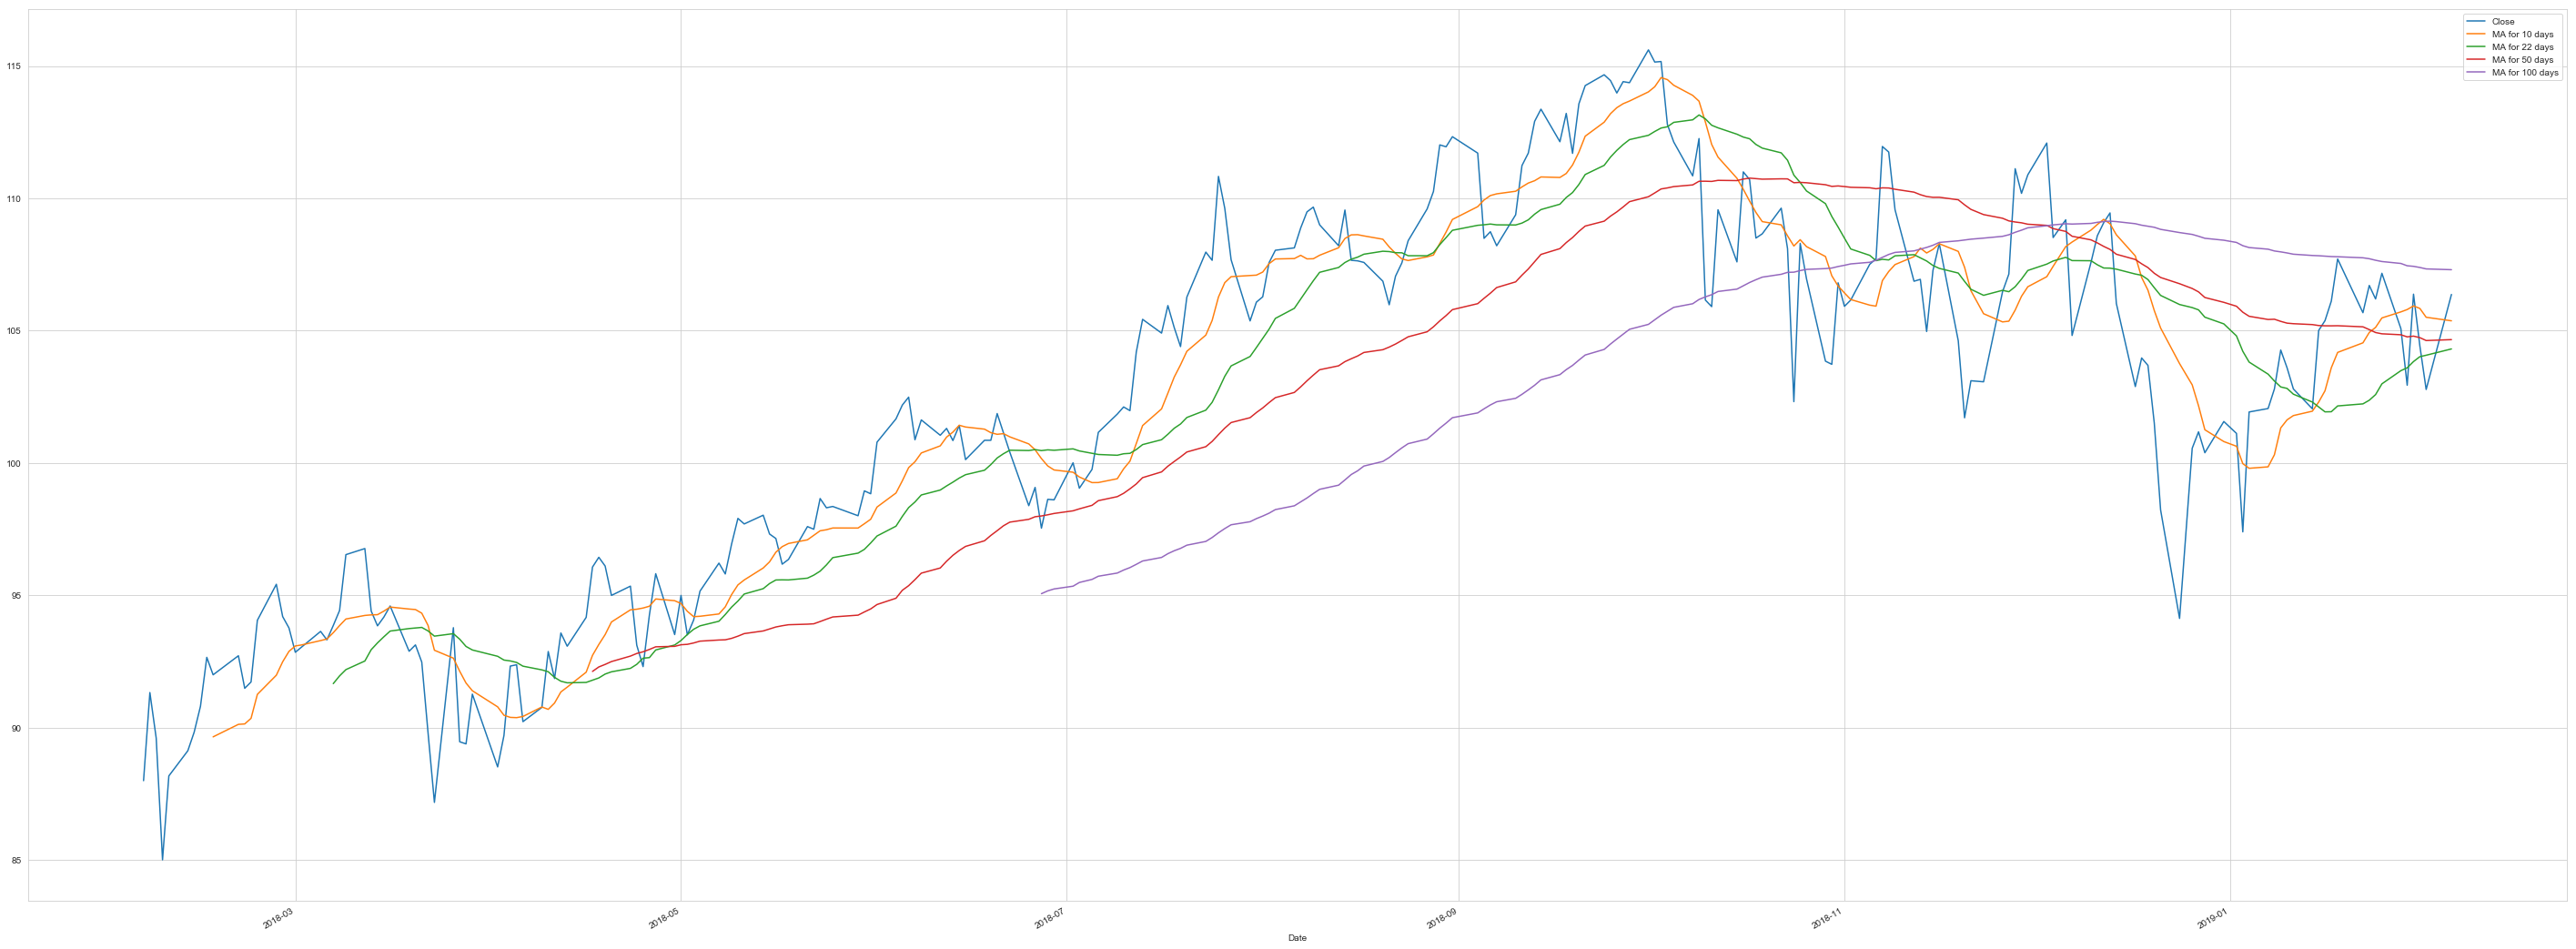

In [7]:
#1 Moving Average(MA)
MA_day = [10,22,50,100]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    MSFT[column_name] = moving_avg = MSFT['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
MSFT[['Close','MA for 10 days','MA for 22 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(50,20))

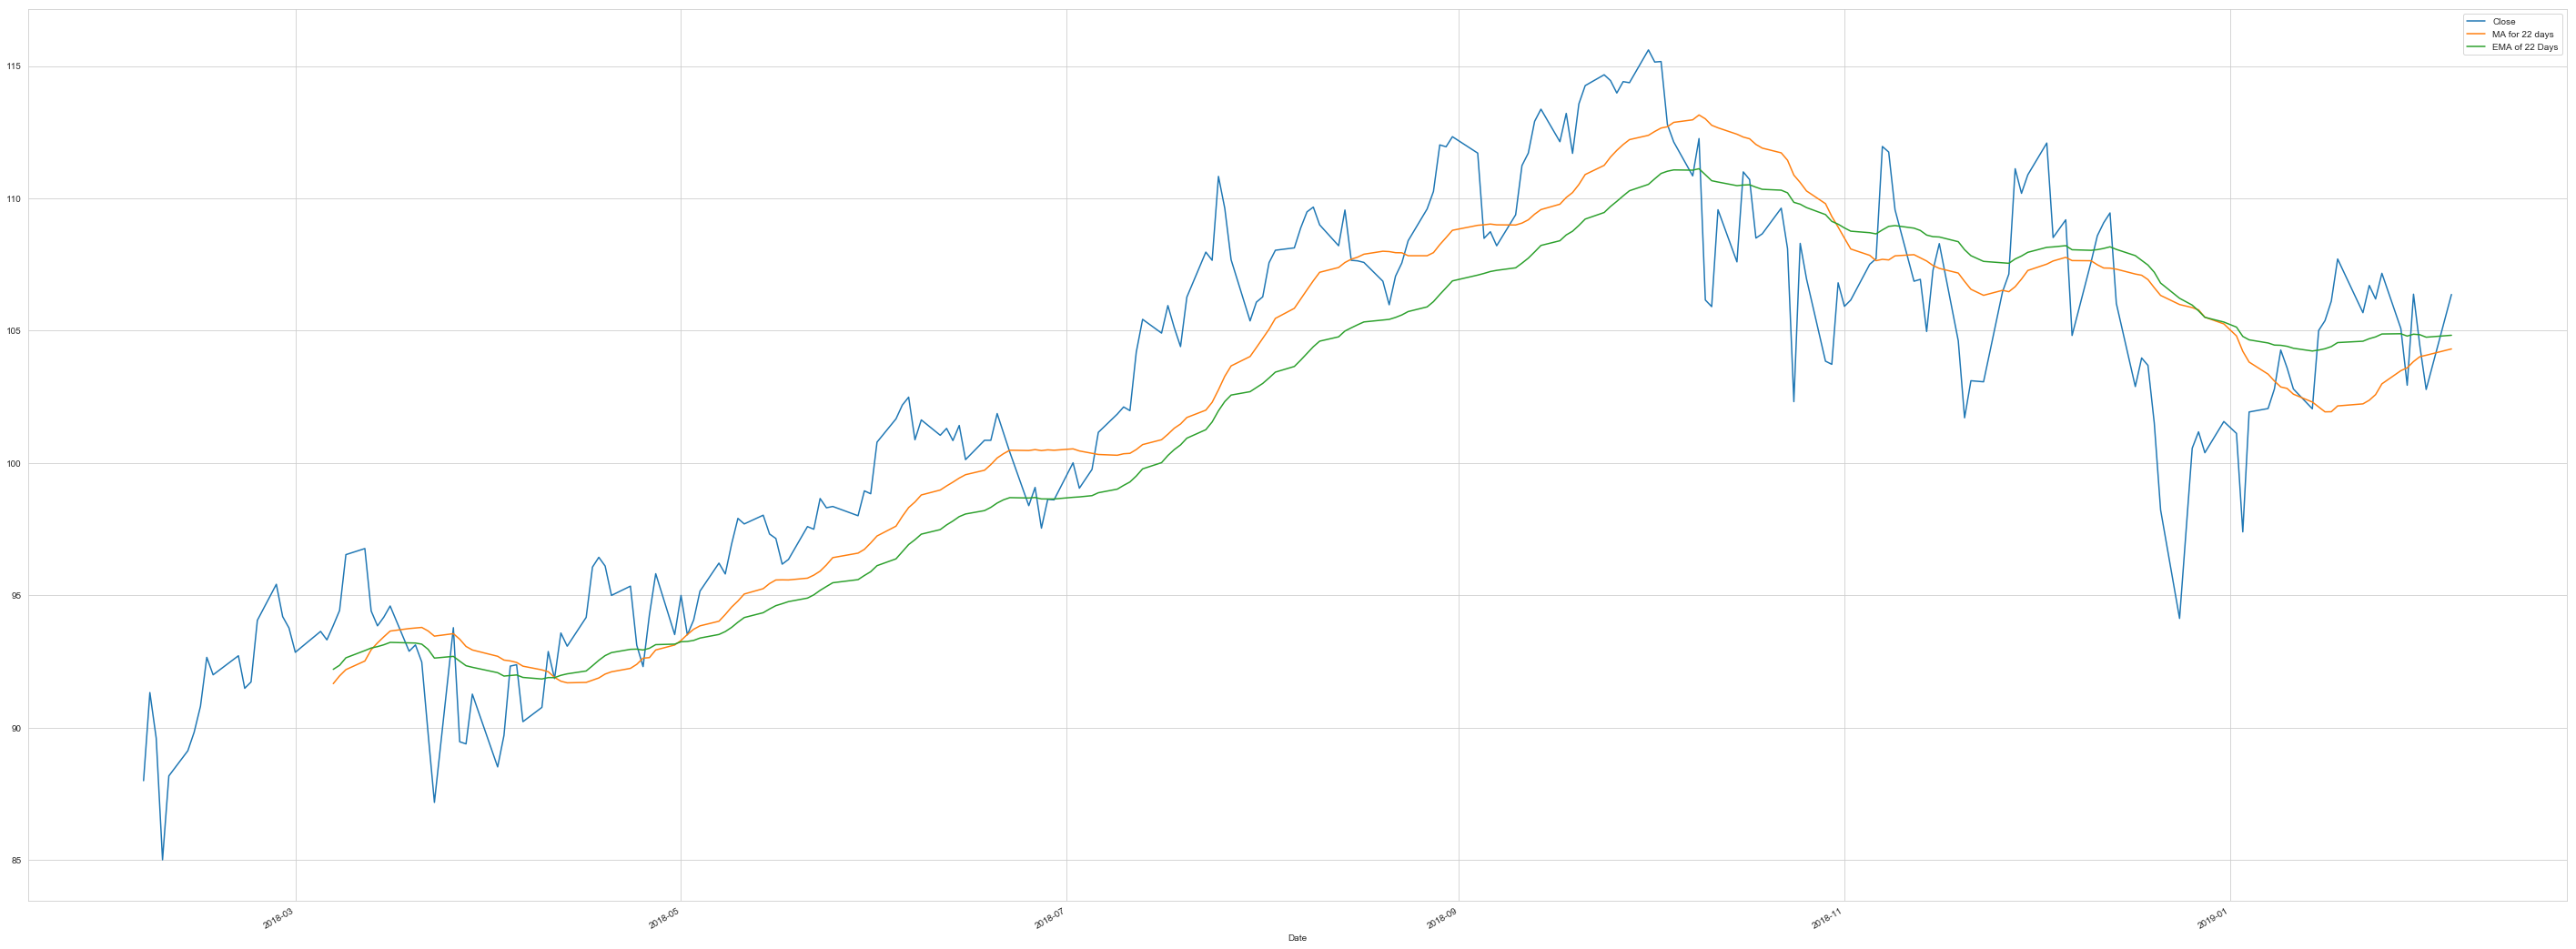

In [62]:
#2 Exponential Moving Average (EMA)
emaPeriod = 22
MSFT['EMA of 22 Days'] = MSFT['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','MA for 22 days','EMA of 22 Days']].plot(subplots=False,figsize=(50,20))

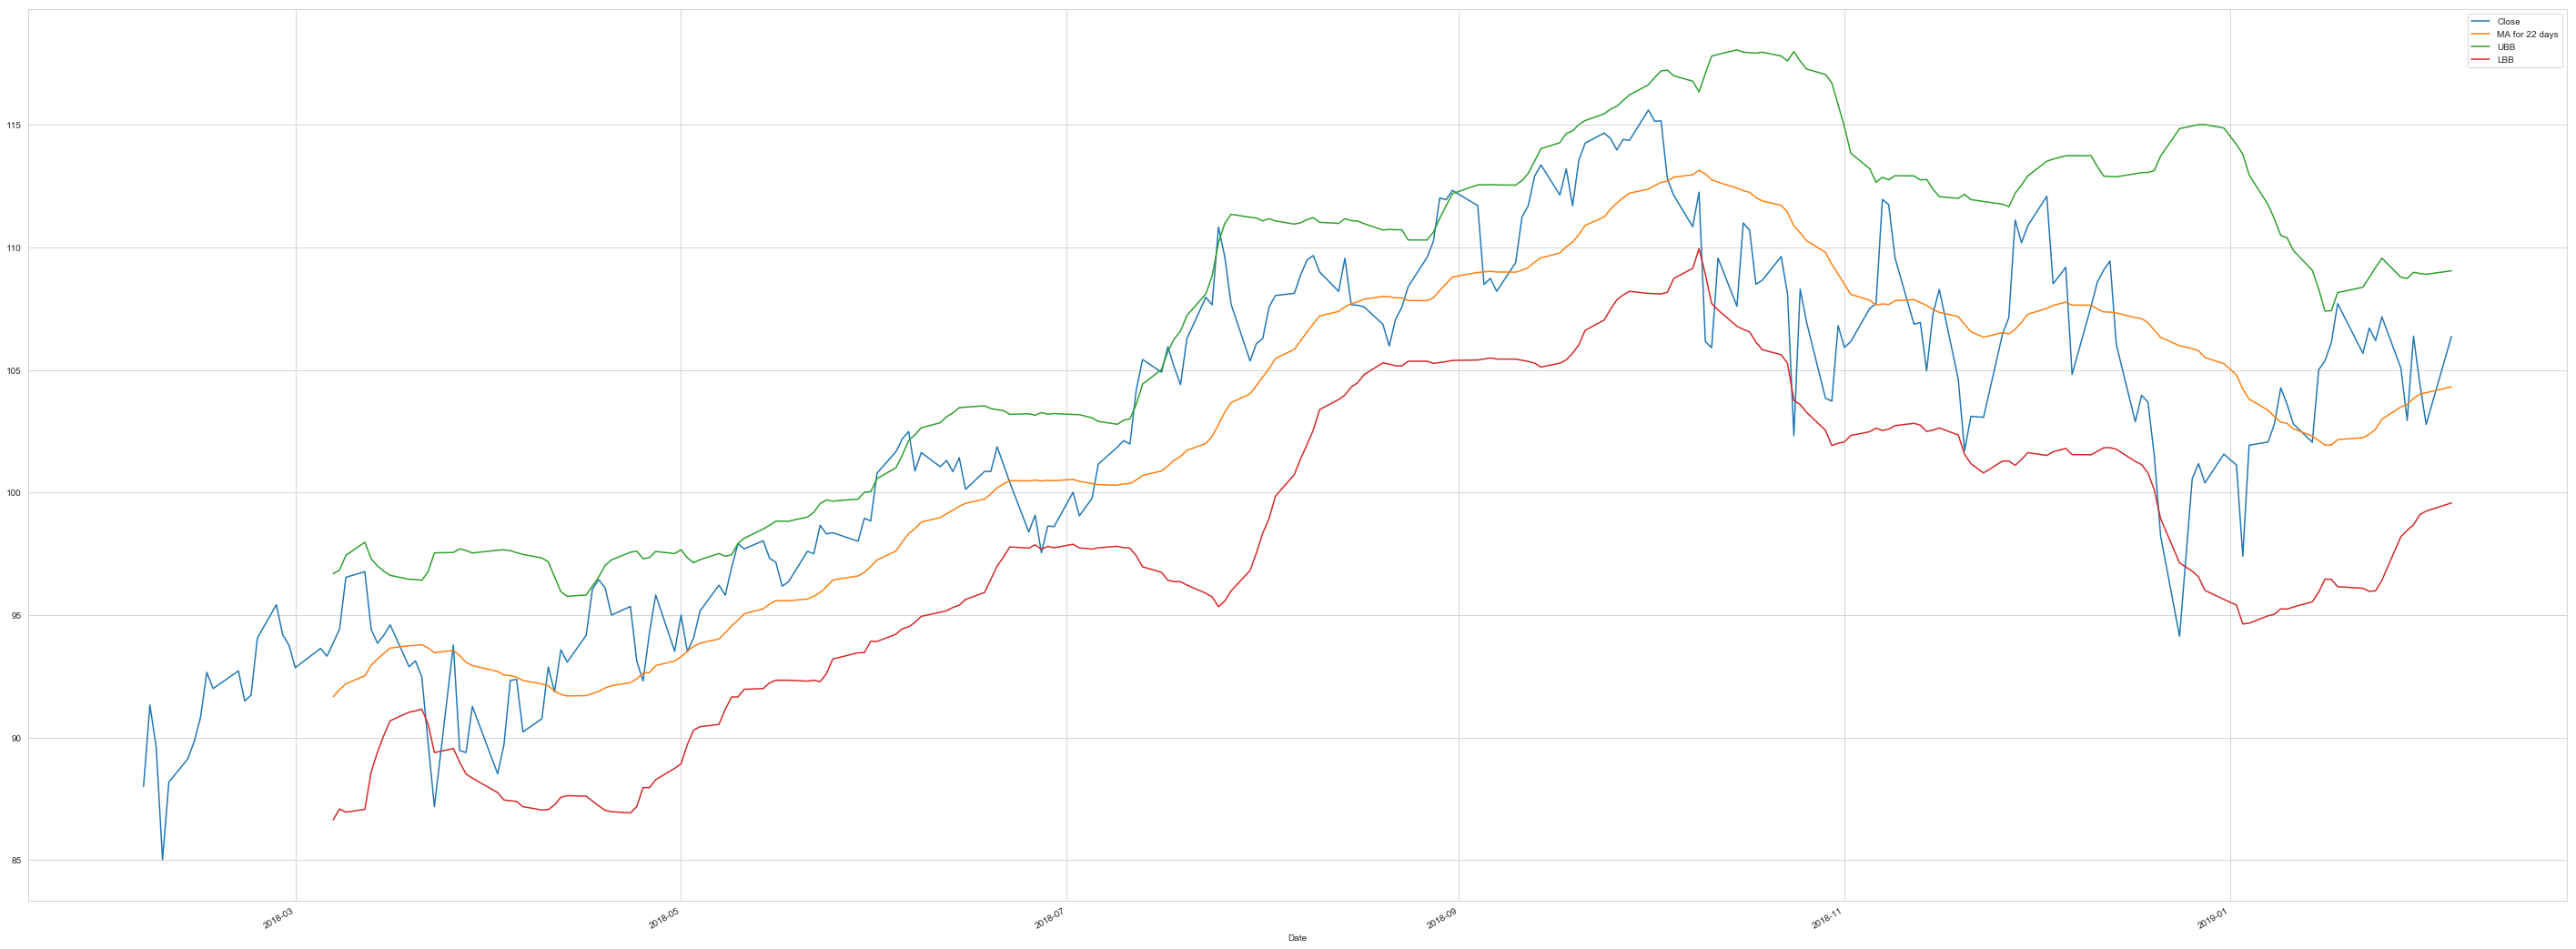

In [12]:
#3 Bollinger Bands (BB)
SD = MSFT['Close'].rolling(22).std()
MSFT['UBB'] = MSFT['MA for 22 days'] + (2*SD)
MSFT['LBB'] = MSFT['MA for 22 days'] - (2*SD)
MSFT[['Close','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

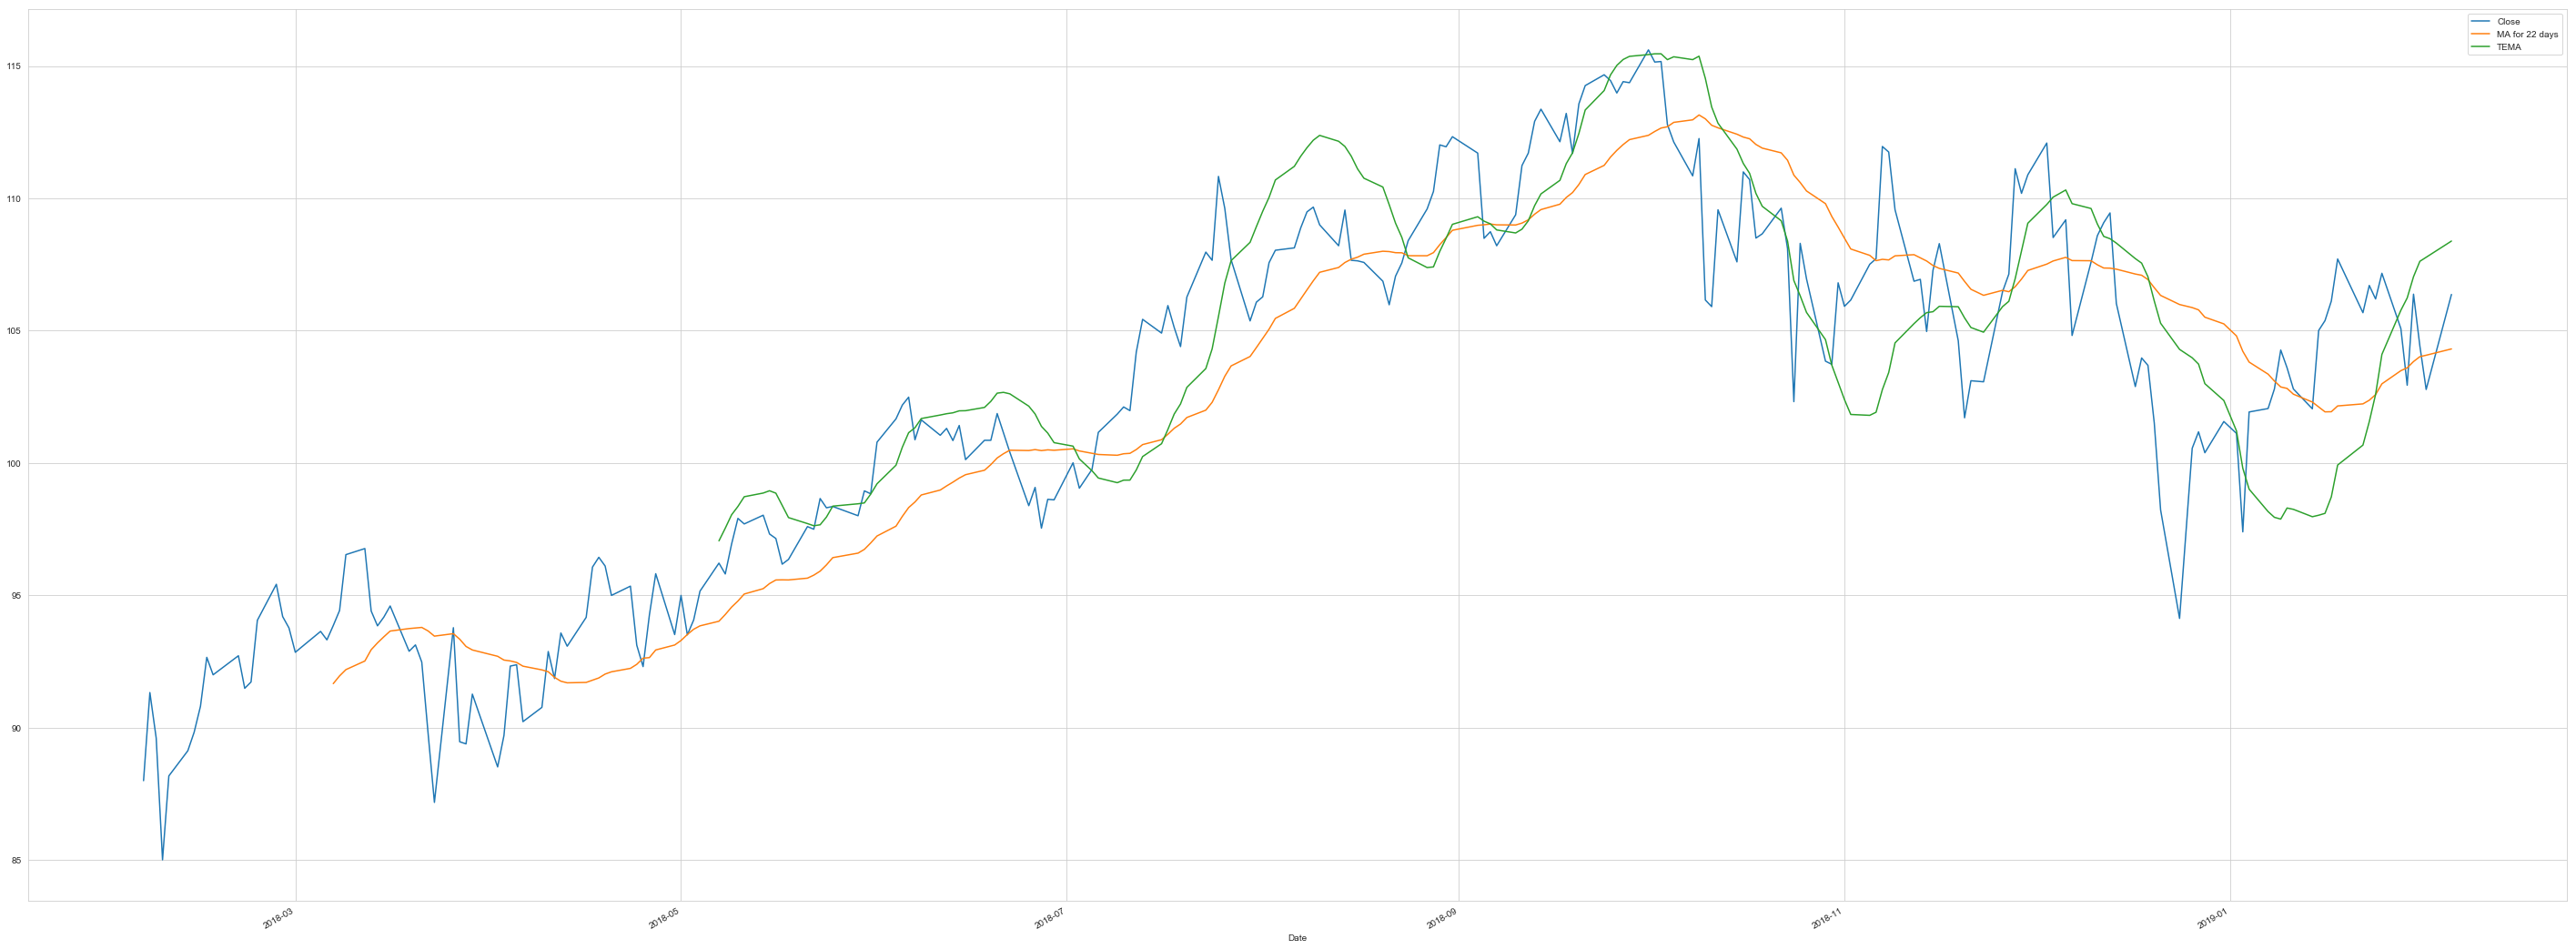

In [14]:
#4 Triple Exponential Moving Average (TEMA)
MSFT['MA2'] = MSFT['MA for 22 days'].rolling(22).mean()
MSFT['MA3'] = MSFT['MA2'].rolling(22).mean()
MSFT['TEMA'] = 3*MSFT['MA for 22 days'] - 3*MSFT['MA2'] + MSFT['MA3']
MSFT[['Close','MA for 22 days','TEMA']].plot(subplots=False,figsize=(50,20))

In [15]:
#5 %b
MSFT['pctB'] = 20 * (MSFT['Close'] - MSFT['LBB']) / (MSFT['UBB'] - MSFT['LBB'])
MSFT[['Close','pctB','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

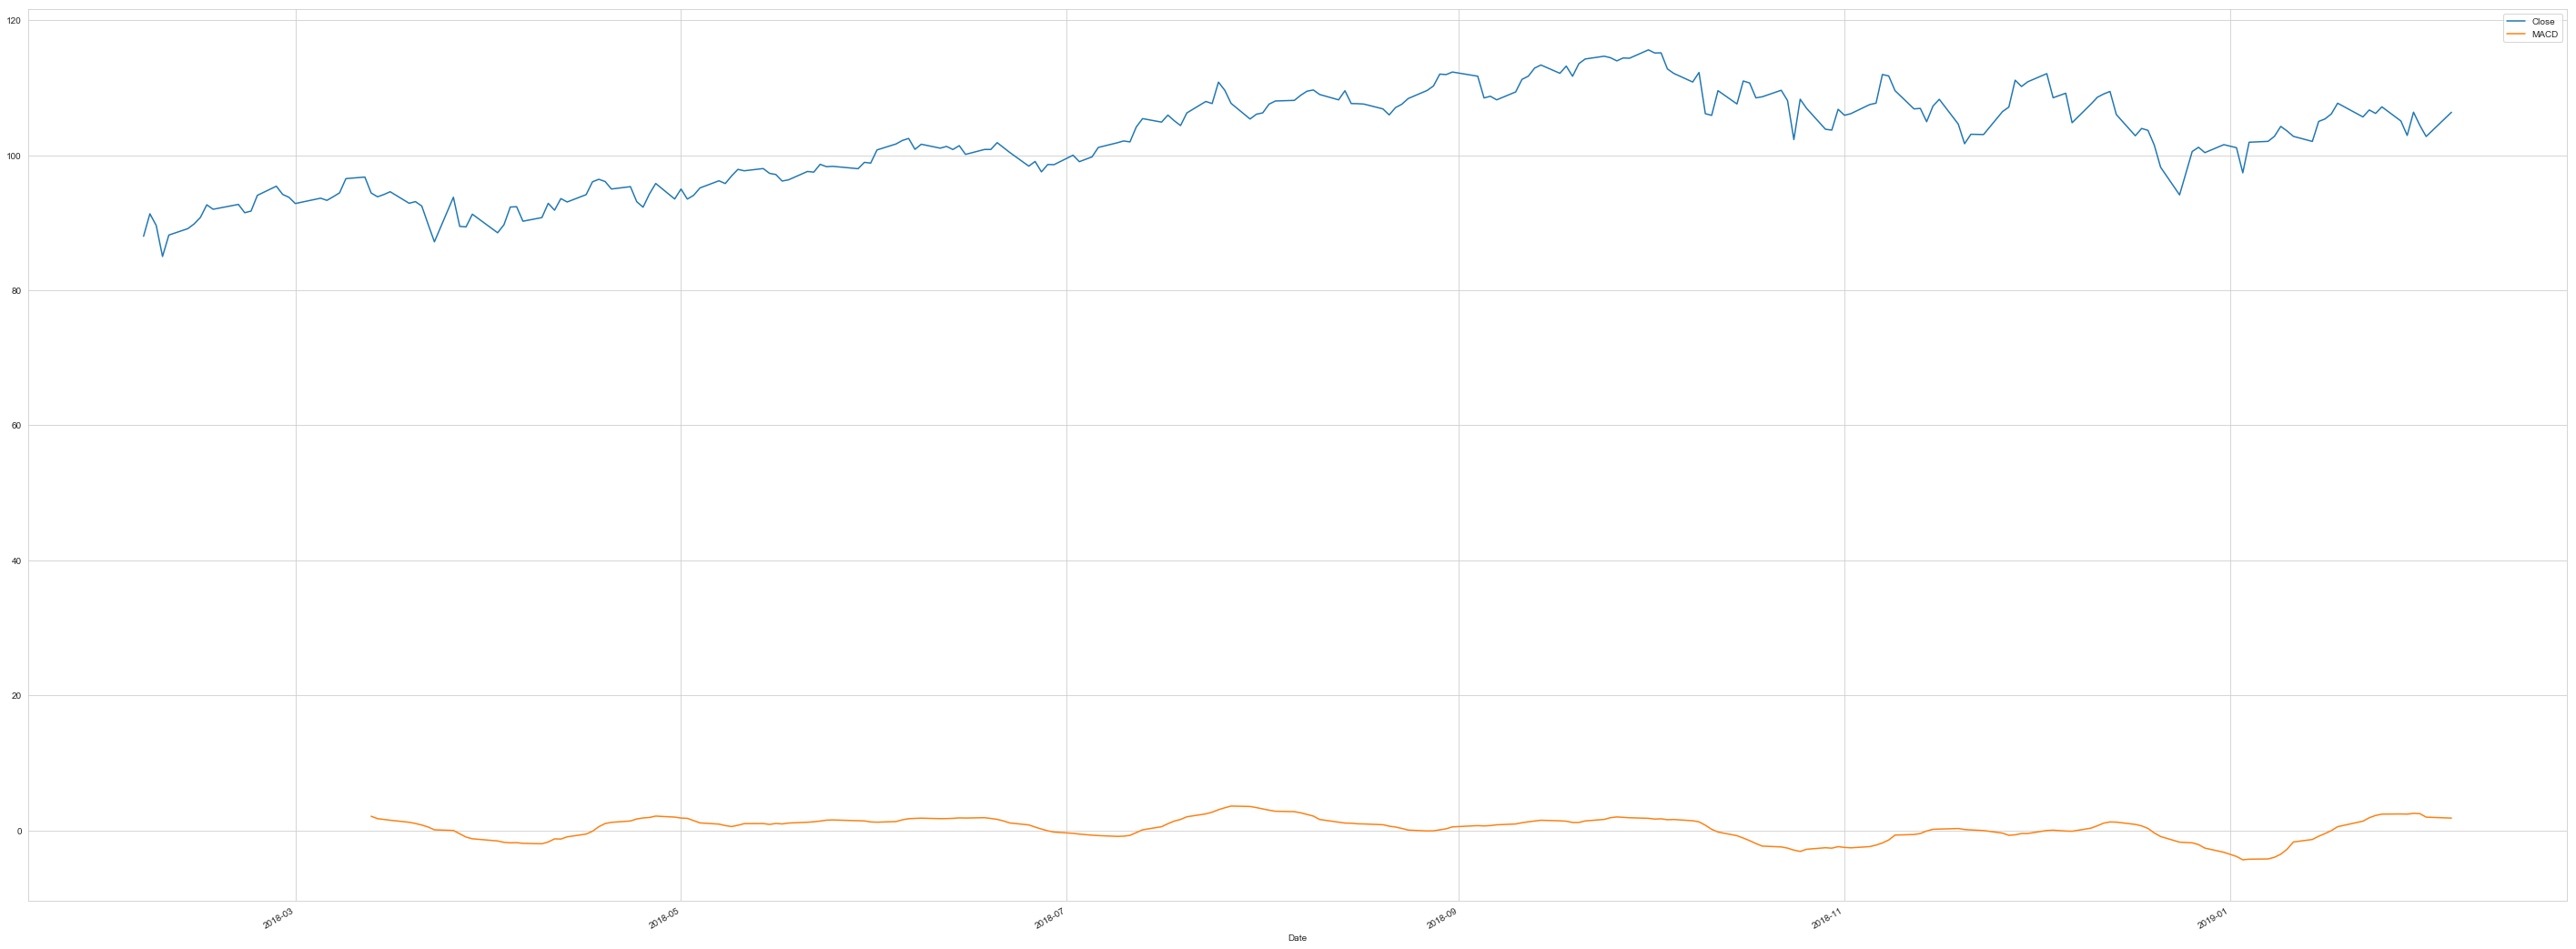

In [17]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = MSFT['Close'].rolling(12).mean()
MA26 = MSFT['Close'].rolling(26).mean()
MACD = MA12 - MA26
MSFT['MACD'] = MACD
MSFT[['Close','MACD']].plot(subplots=False,figsize=(50,20))

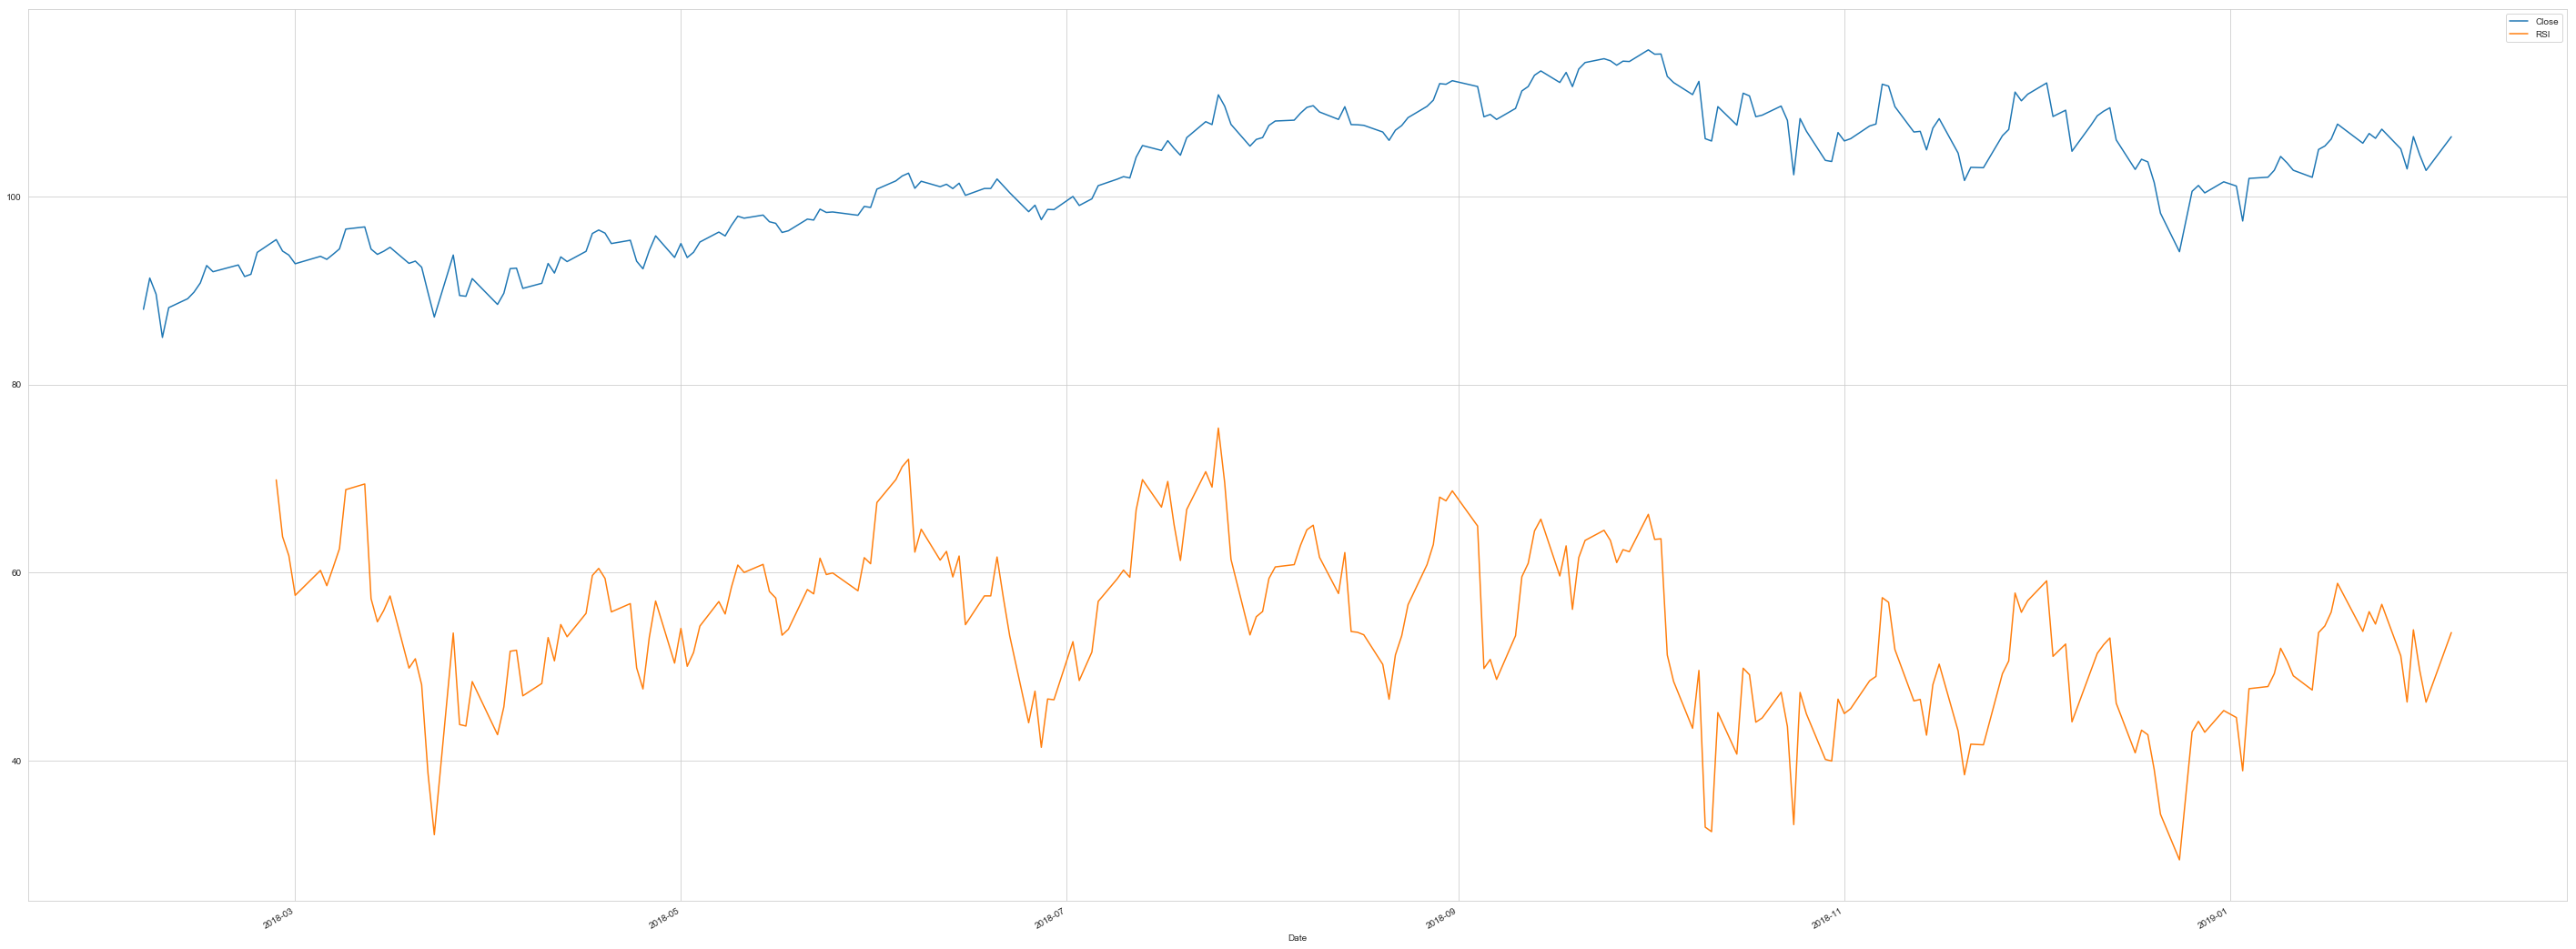

In [18]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = MSFT['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
MSFT['RSI'] = rsi
MSFT[['Close','RSI']].plot(subplots=False,figsize=(50,20))

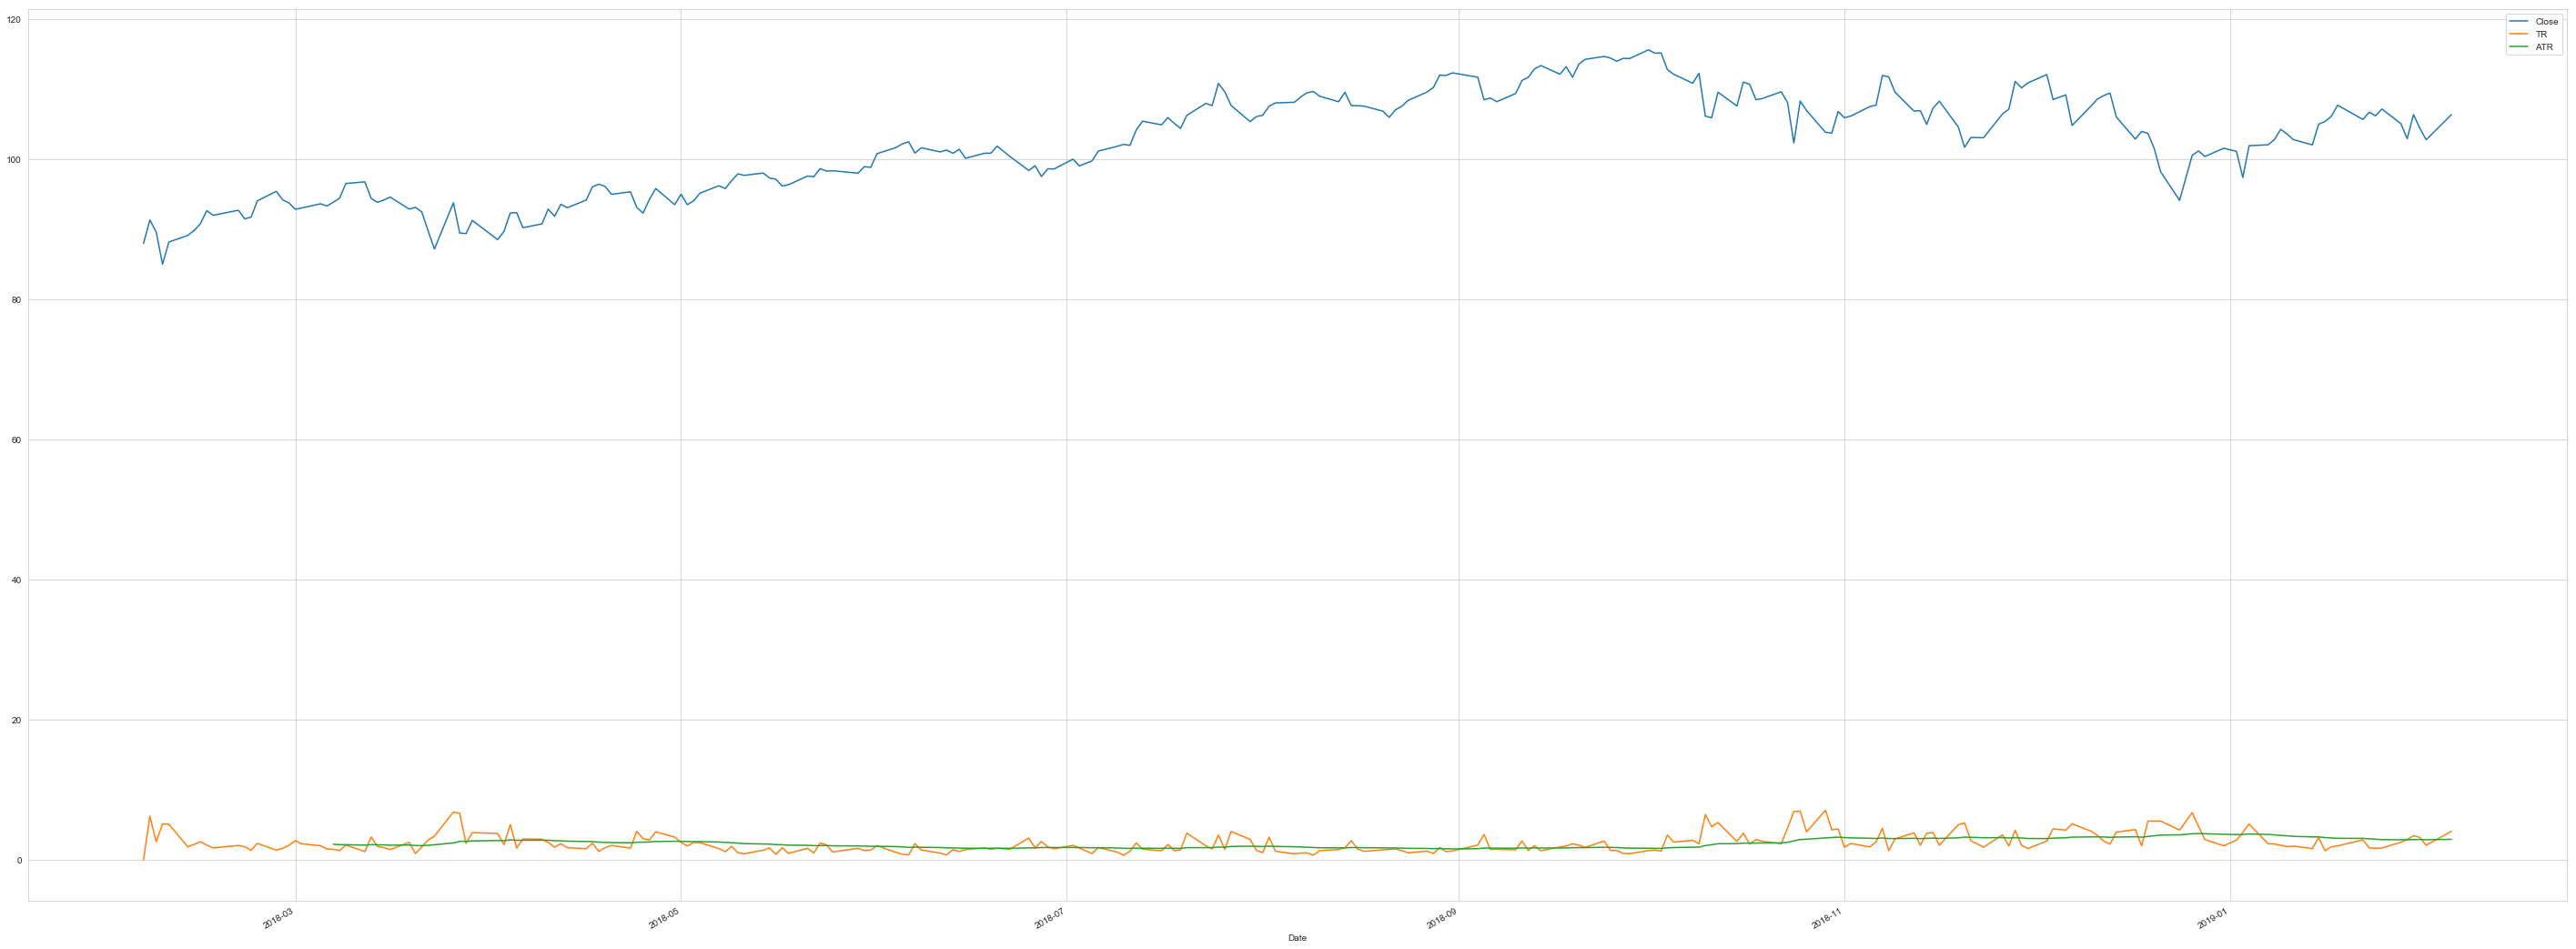

In [19]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(MSFT['Close']):
    TR = TRange(MSFT['High'][x],MSFT['Low'][x],MSFT['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
MSFT['TR'] = TrueRange
MSFT['ATR'] = MSFT['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))

In [121]:
#9  Chandelier Exit 
def Highest(n,emaPeriod):
    max=MSFT['Close'][n]
    for i in range(n,n+emaPeriod+1):
        if MSFT['Close'][i] > max:
            max = MSFT['Close'][i]
    return max
fac =3
ChandelierExitL=np.array([])
ChandelierExitL = np.append(ChandelierExitL, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    ChandelierExit = Highest(i,emaPeriod) - fac*MSFT['ATR'][i+emaPeriod]
    ChandelierExitL = np.append(ChandelierExitL,ChandelierExit)
MSFT['ChandelierExitL']=ChandelierExitL
MSFT[['Close','ChandelierExitL']].plot(subplots=False,figsize=(50,20))

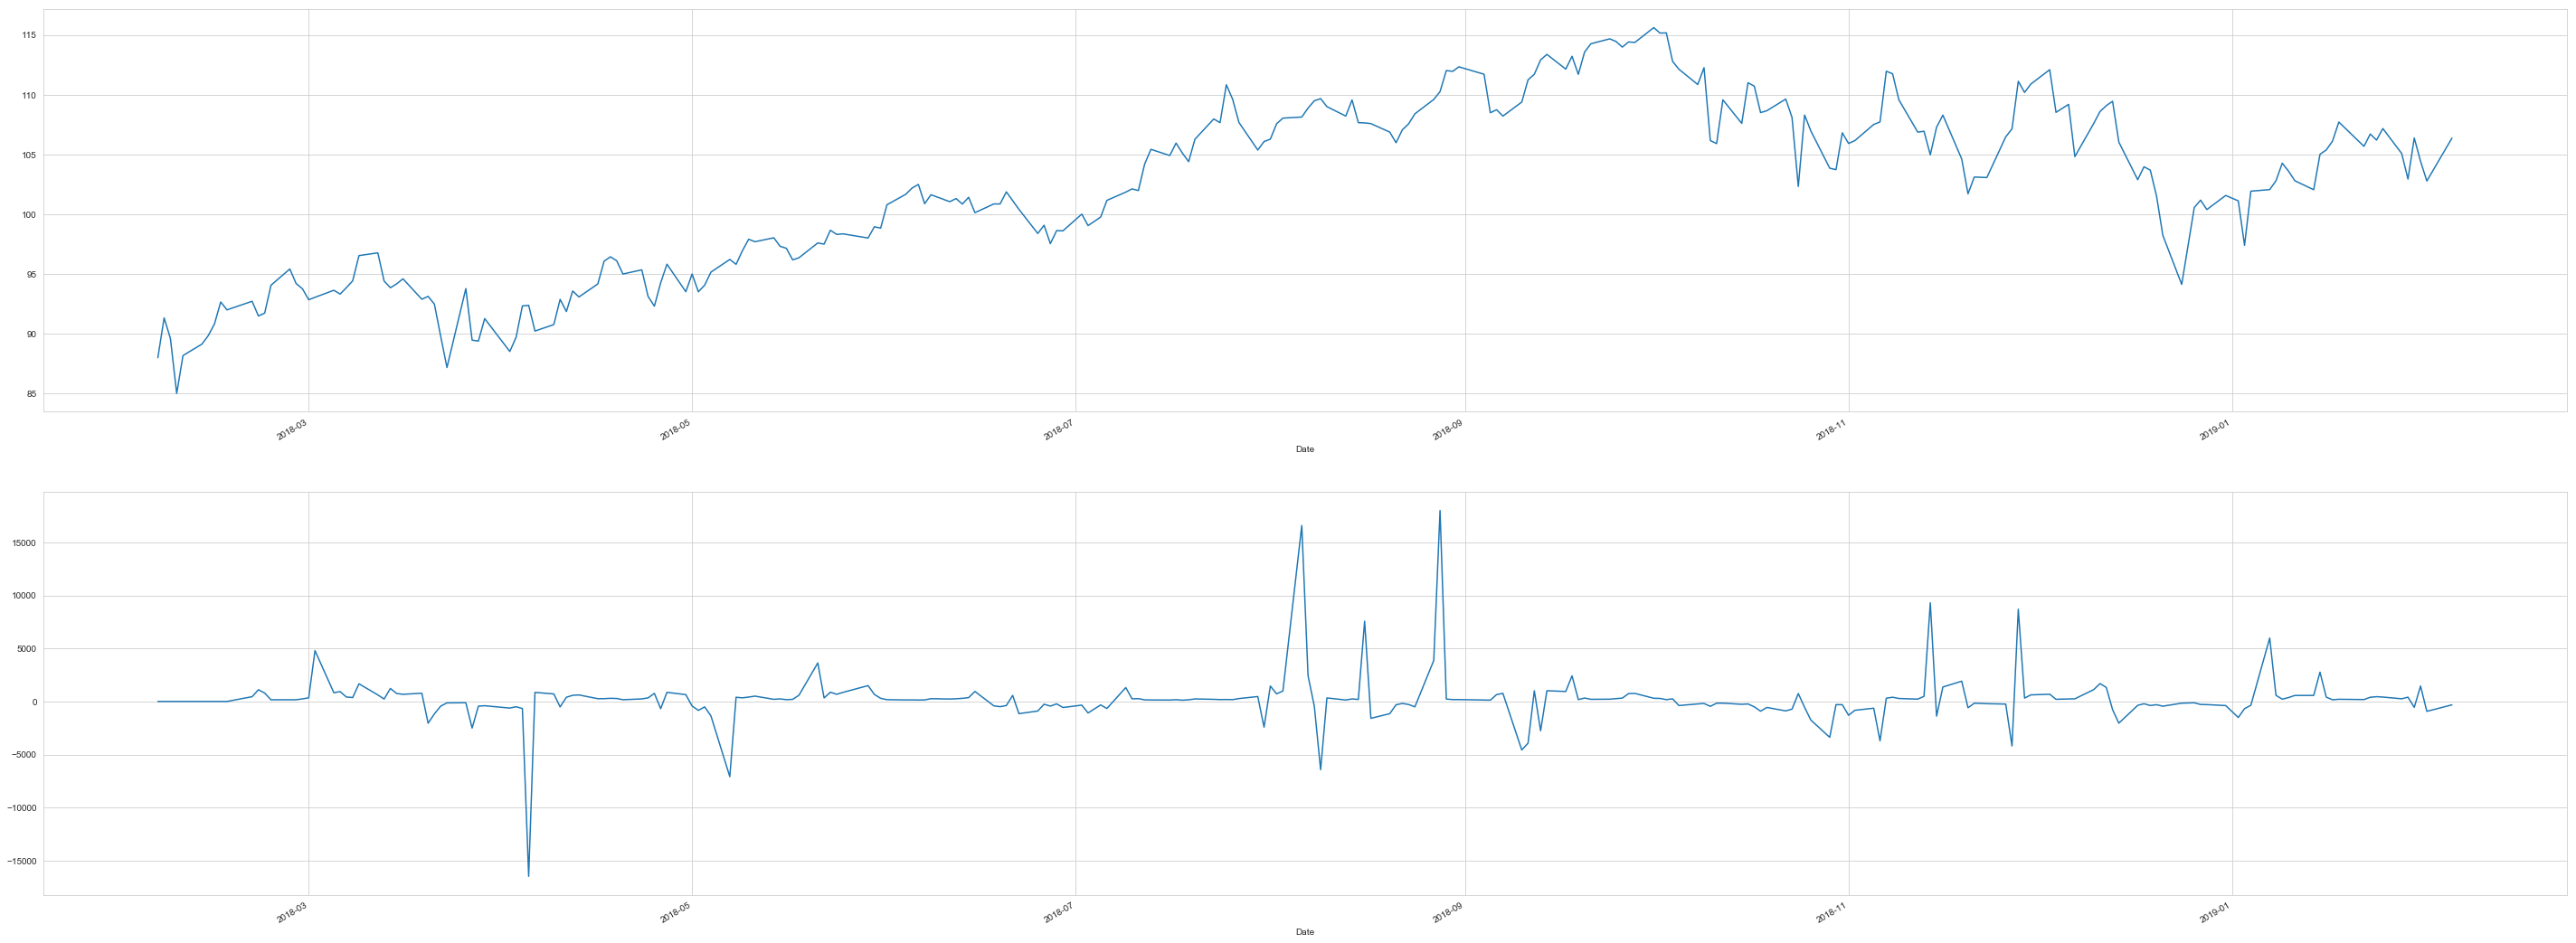

In [56]:
#10 Chande Momentum Oscillator (MOM)
def cmo(timeFrame):
    x=timeFrame
    CMO = []
    for i in range(0,timeFrame):
        CMO.append(0);
    MSFT['Diff'] = MSFT['Close'].diff()
    while x < len(MSFT['Close']):
        upSum=0
        downSum=0
        y=x-timeFrame+1
        while y<x:
            if MSFT['Diff'][y]>=0:
                upSum += MSFT['Diff'][y]
            else:
                downSum += MSFT['Diff'][y]
            y+=1
        curCMO = ((upSum-downSum)/(upSum+float(downSum)))*100
        CMO.append(curCMO)
        x+=1
    MSFT['CMO'] = CMO
    return
cmo(10)
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['CMO'].plot(subplots=False,figsize=(50,20))

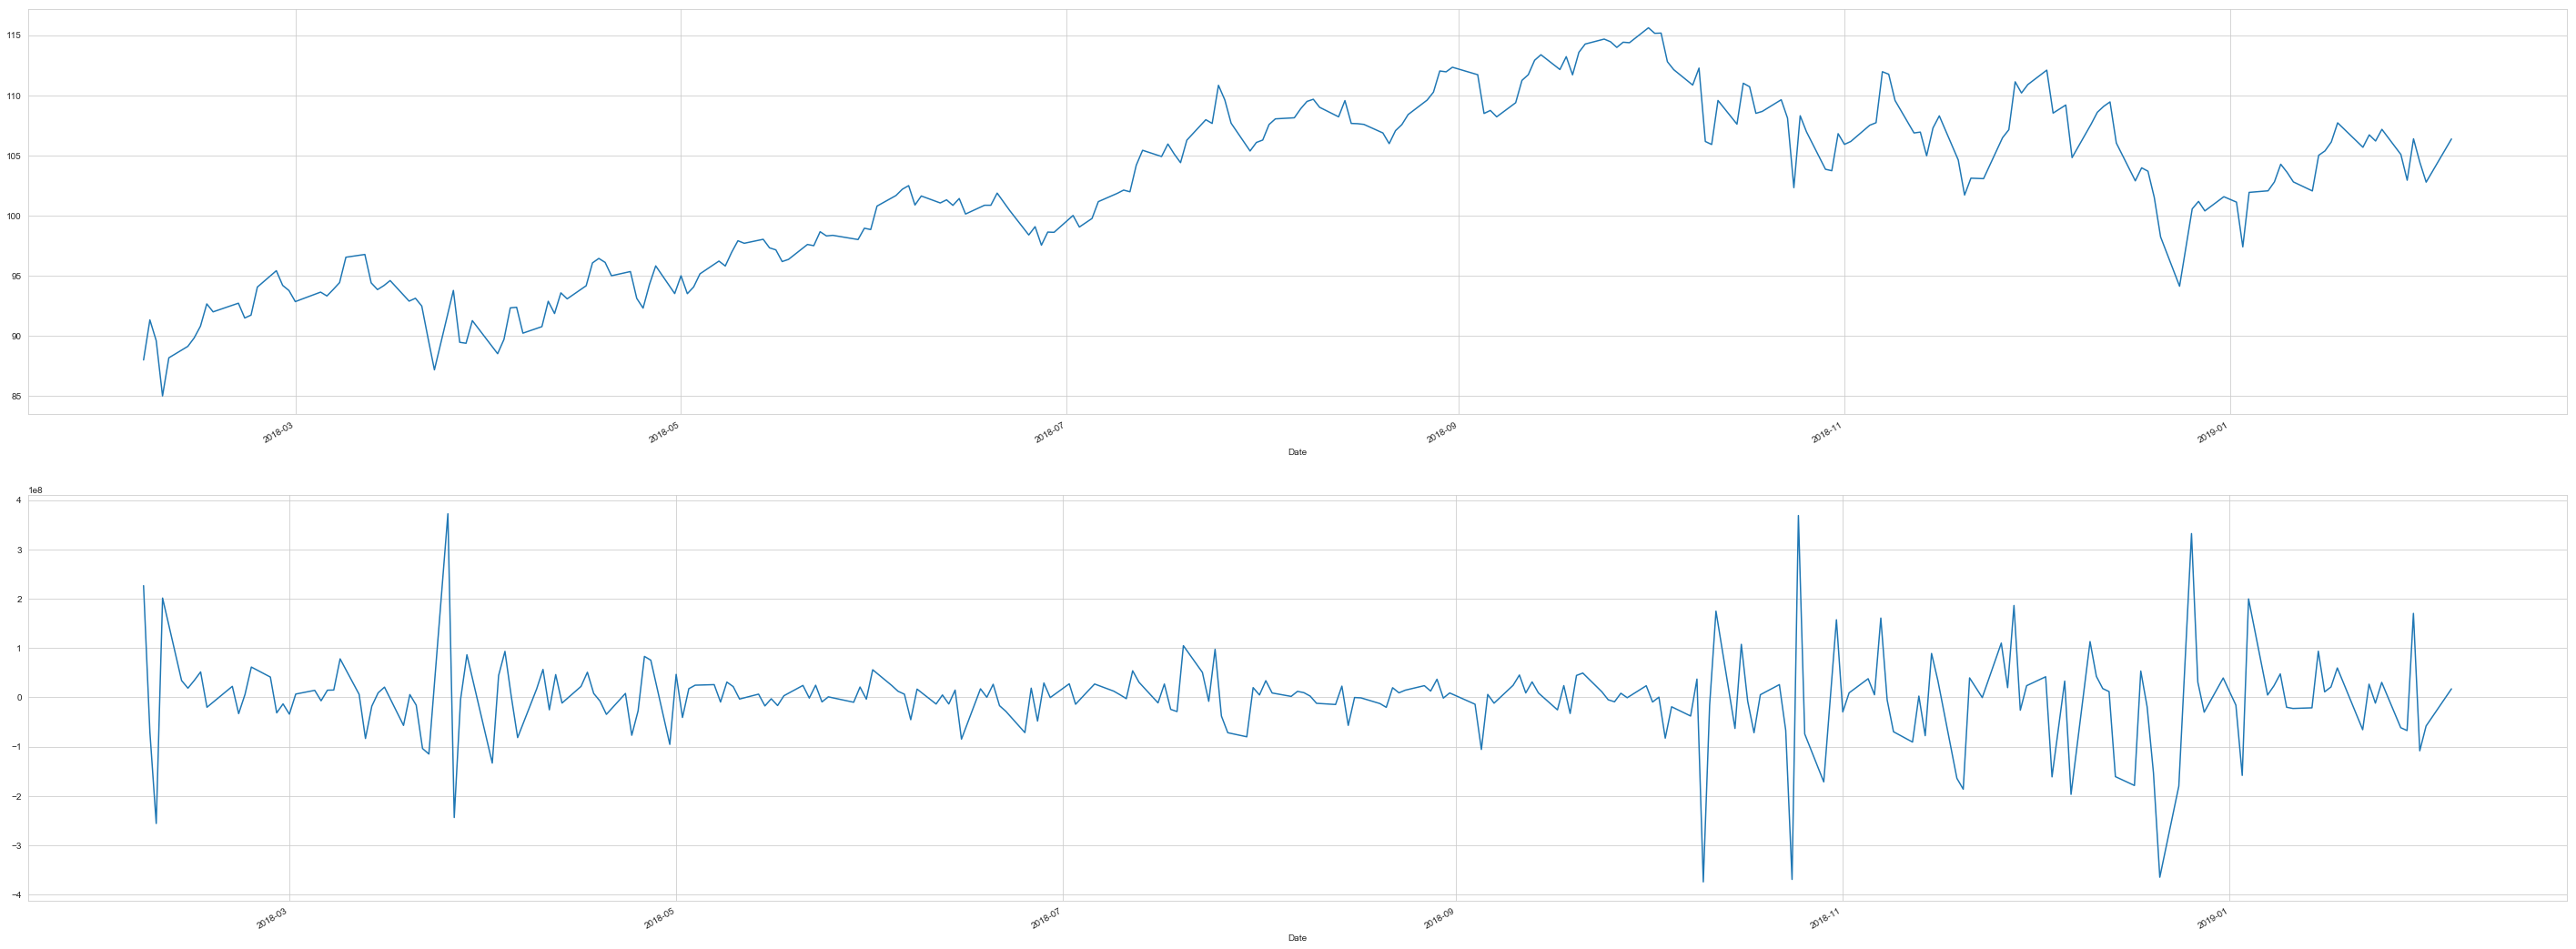

In [55]:
#11 Force Index (FI)
FI = np.array([])
FI = np.append(FI, np.nan)
for i in range(1,len(MSFT['Close'])):
    FIVal = (MSFT['Close'][i] - MSFT['Close'][i-1])*MSFT['Volume'][i]
    FI = np.append(FI,FIVal)
MSFT['FI']=FI
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['FI'].plot(subplots=False,figsize=(50,20))

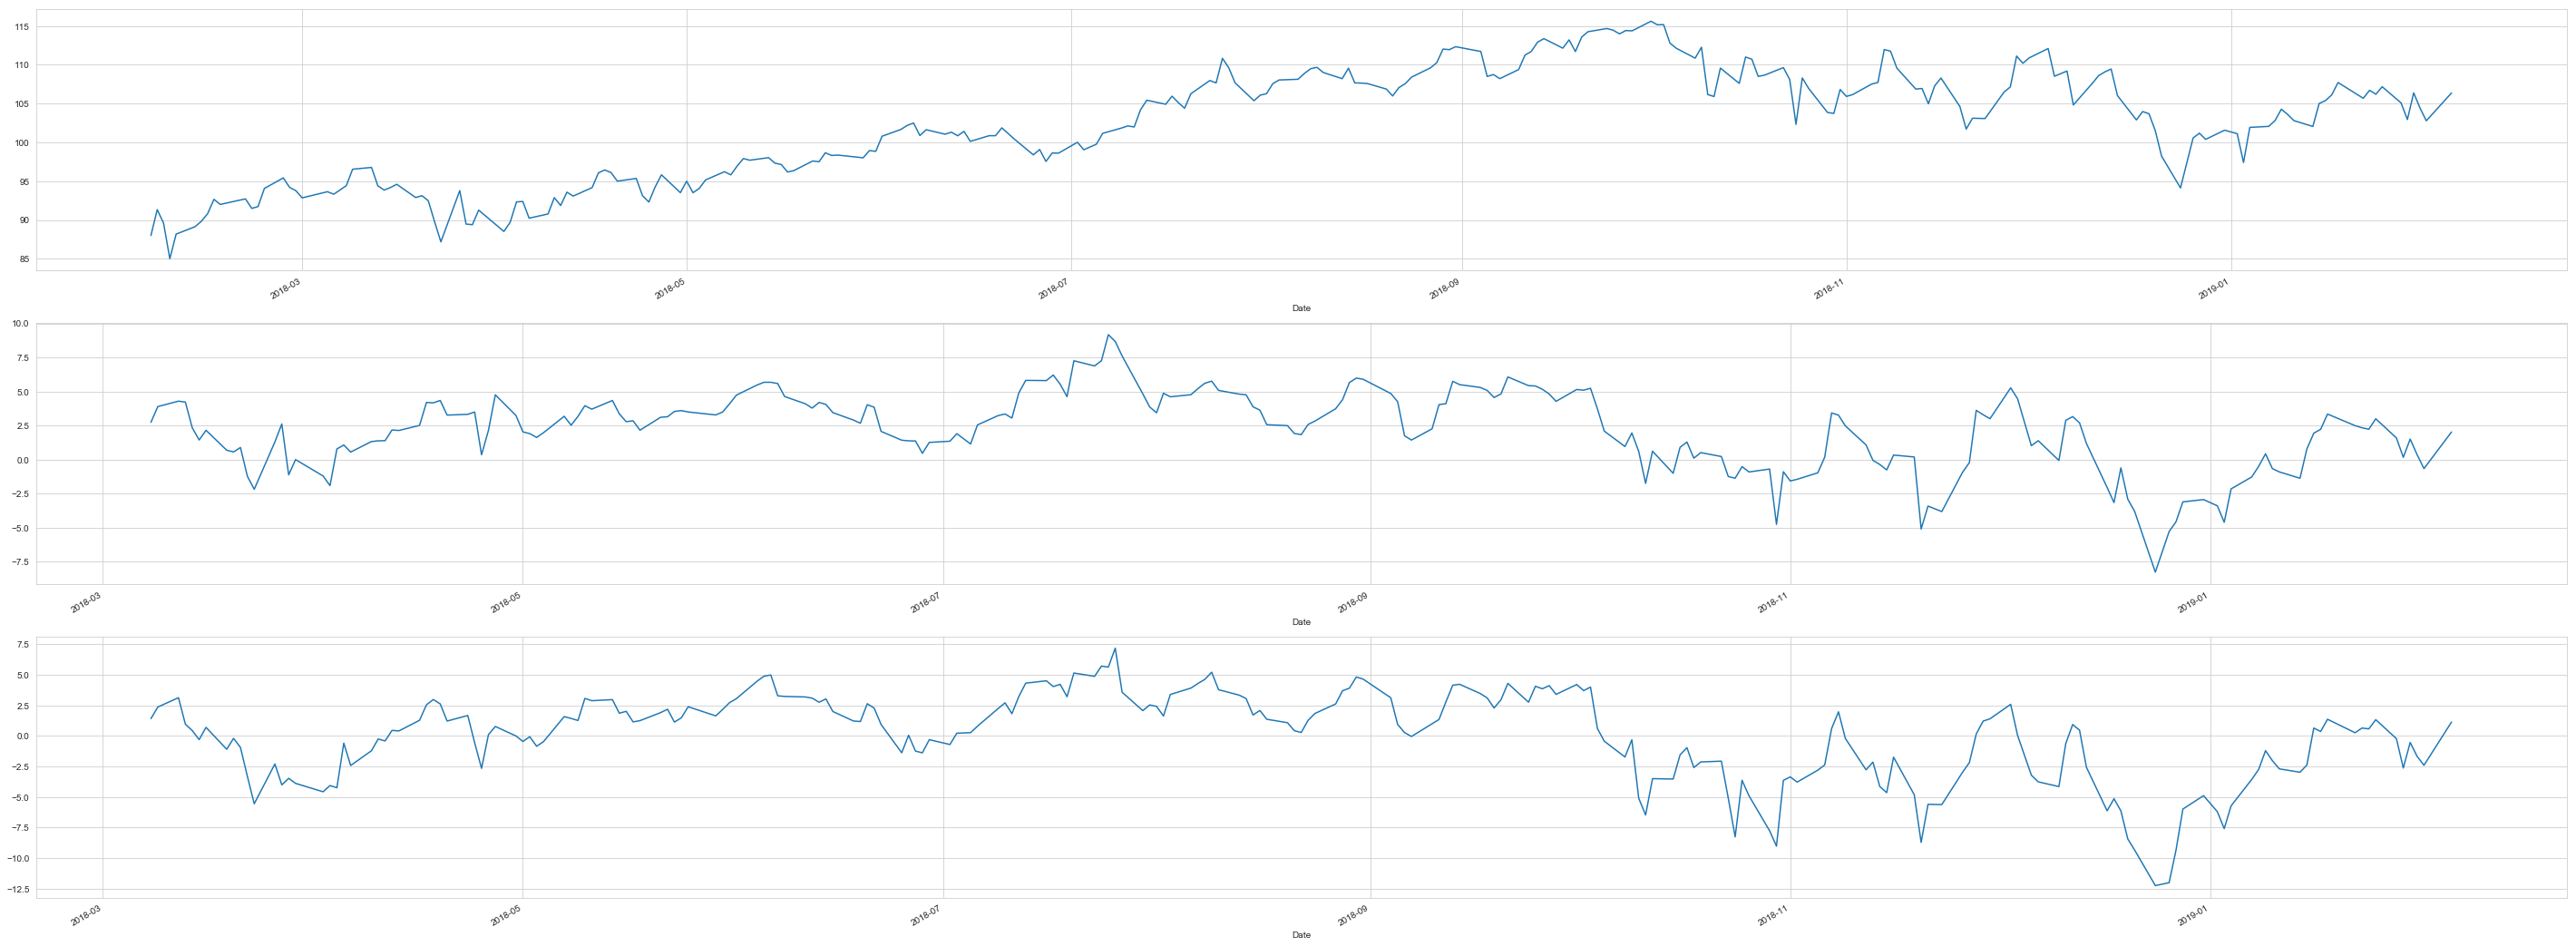

In [78]:
#12 Elder-ray
BullPower = np.array([])
BullPower = np.append(BullPower, [np.nan]*emaPeriod)
BearPower = np.array([])
BearPower = np.append(BearPower, [np.nan]*emaPeriod)
for i in range(emaPeriod,len(MSFT['Close'])):
    BullP = MSFT['High'][i] - MSFT['EMA of 22 Days'][i]
    BullPower = np.append(BullPower,BullP)
    BearP = MSFT['Low'][i] - MSFT['EMA of 22 Days'][i]
    BearPower = np.append(BearPower,BearP)
MSFT['BullPower'] = BullPower
MSFT['BearPower'] = BearPower
plt.figure()
plt.subplot(3,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,2)
MSFT['BullPower'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,3)
MSFT['BearPower'].plot(subplots=False,figsize=(50,20))

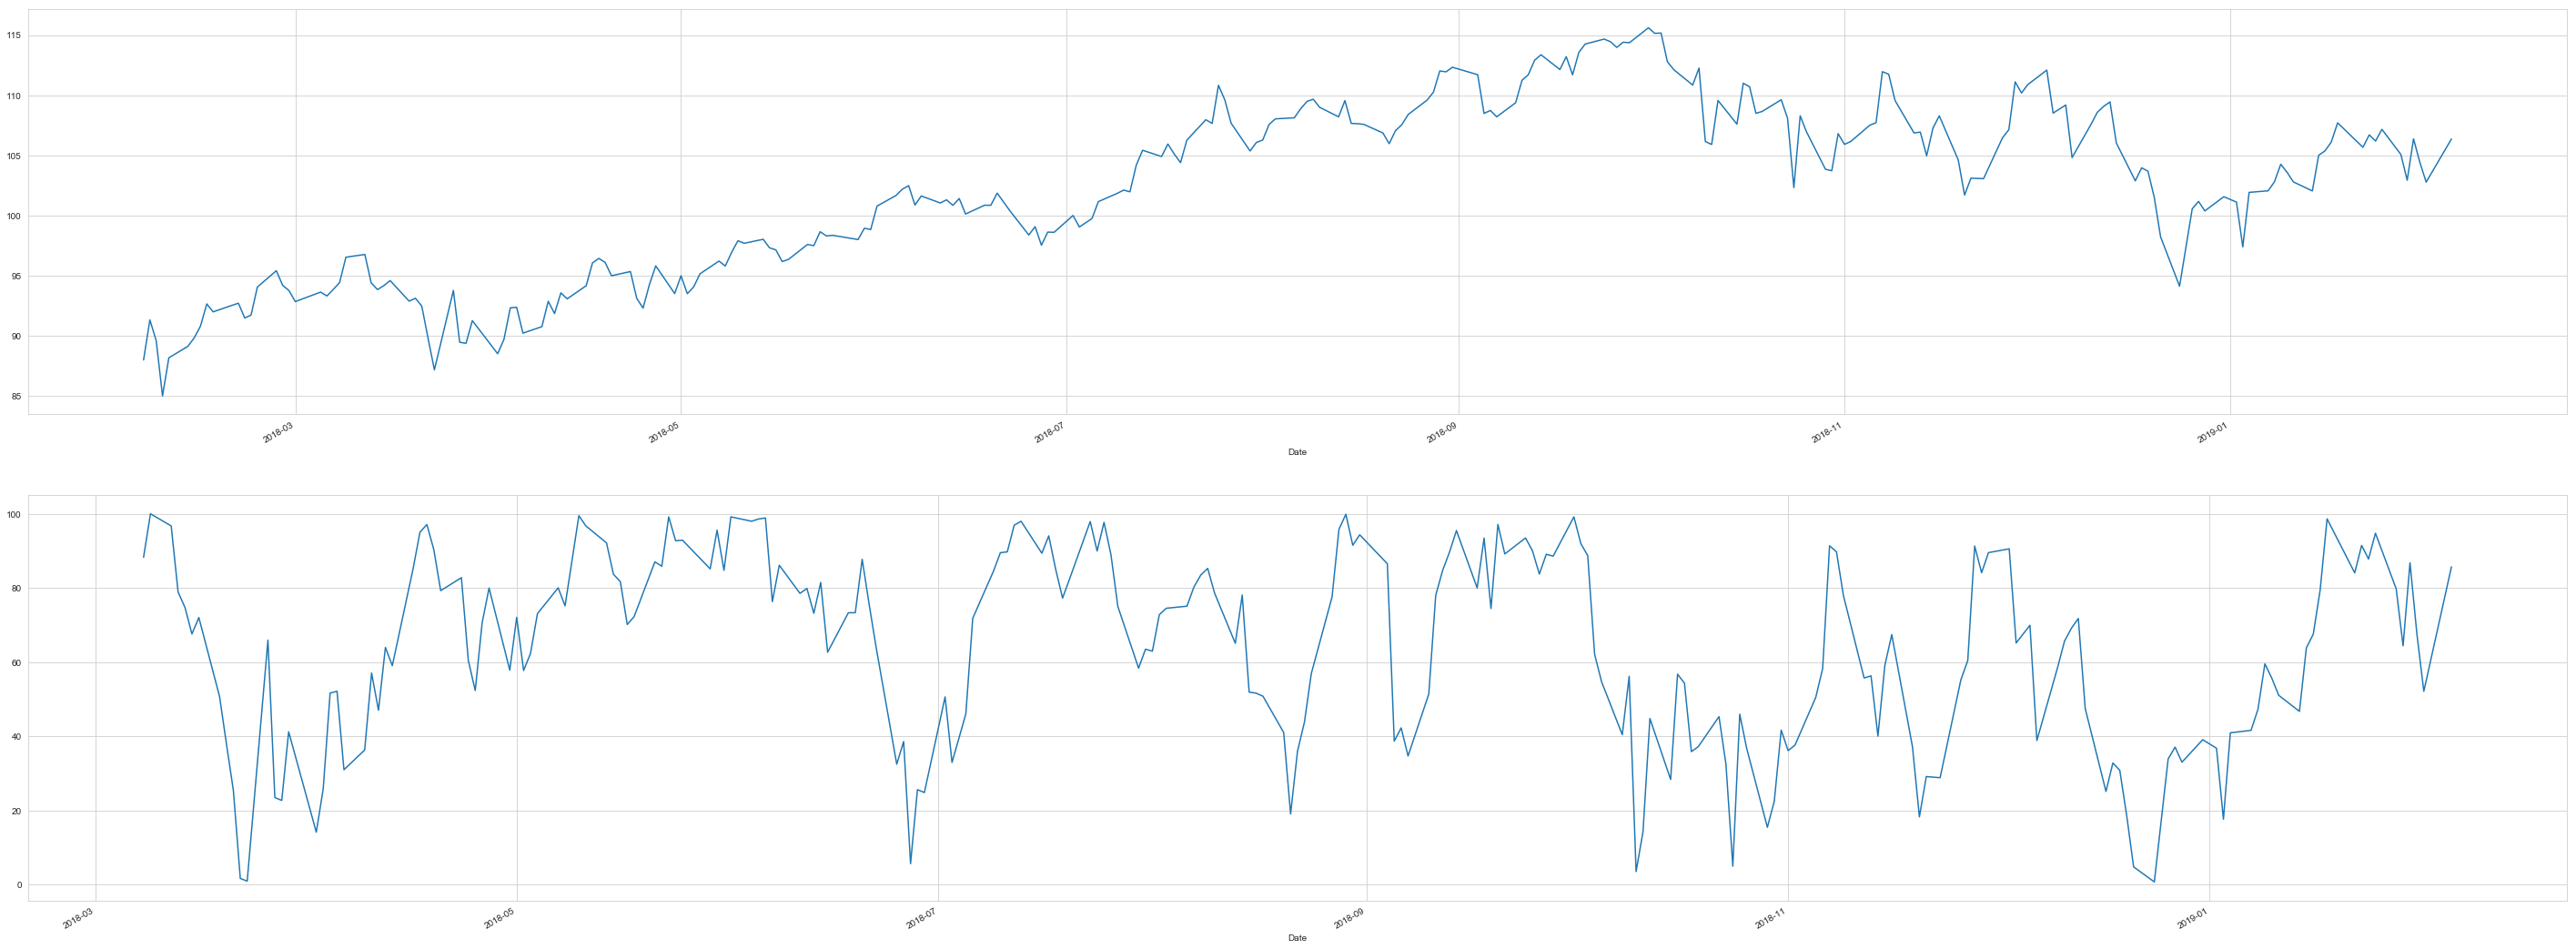

In [124]:
#13 Stochastic %k (STCK)
def HighestLowest(n,period):
    high=MSFT['High'][n]
    low=MSFT['Low'][n]
    for i in range(n,n+period+1):
        if MSFT['High'][i] > high:
            high = MSFT['High'][i]
        if MSFT['Low'][i] < low:
            low = MSFT['Low'][i]
    return high,low
STCK = np.array([])
STCK = np.append(STCK, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    high,low=HighestLowest(i,emaPeriod)
    PK = 100*(MSFT['Close'][i+emaPeriod] - low)/(high - low)
    STCK = np.append(STCK, PK)
MSFT['STCK'] = STCK
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['STCK'].plot(subplots=False,figsize=(50,20))

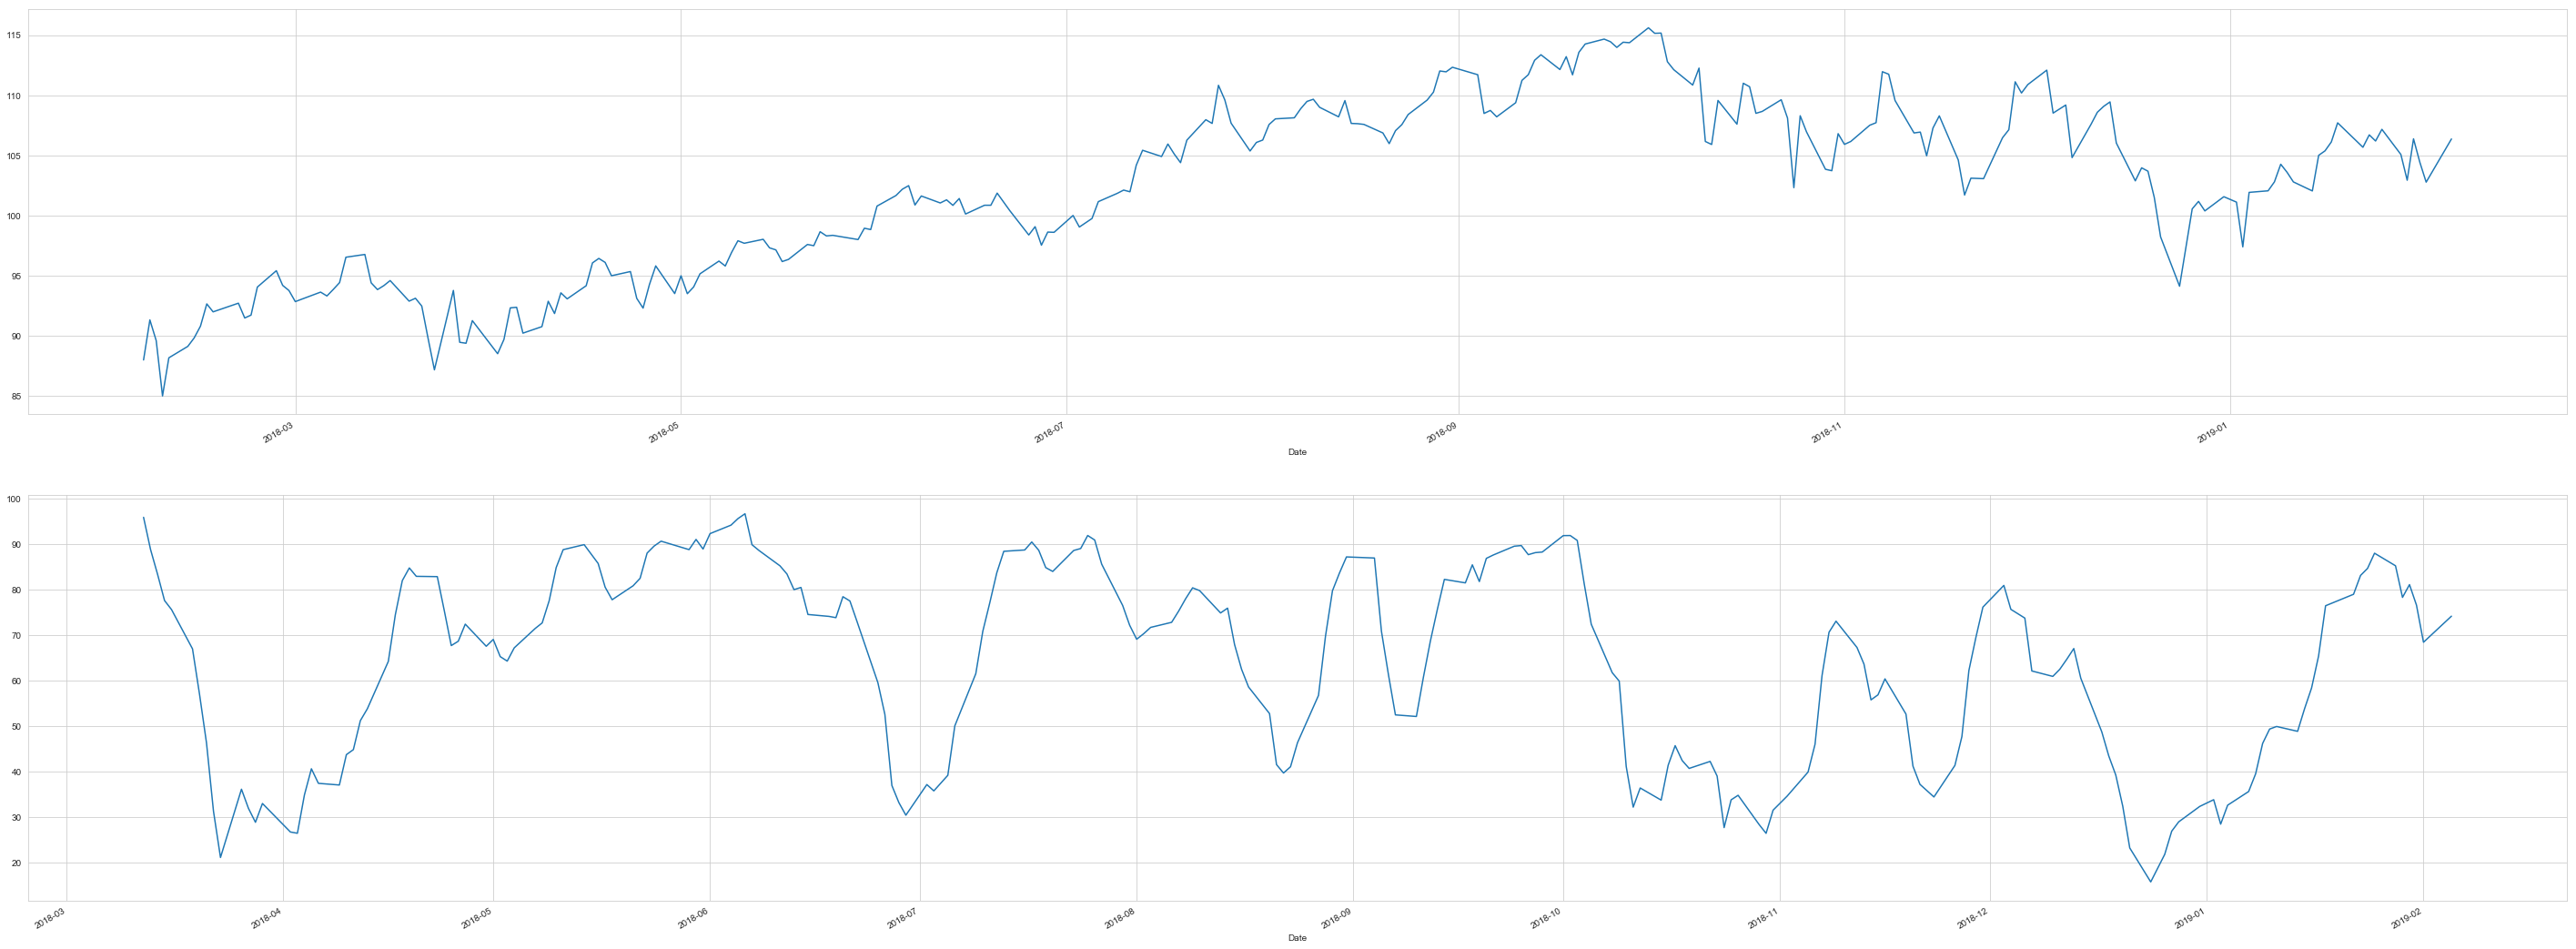

In [125]:
#14 Stochastic %D (STCD)
MSFT['STCD'] = MSFT['STCK'].ewm(com = 2 , min_periods = 3).mean()
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['STCD'].plot(subplots=False,figsize=(50,20))

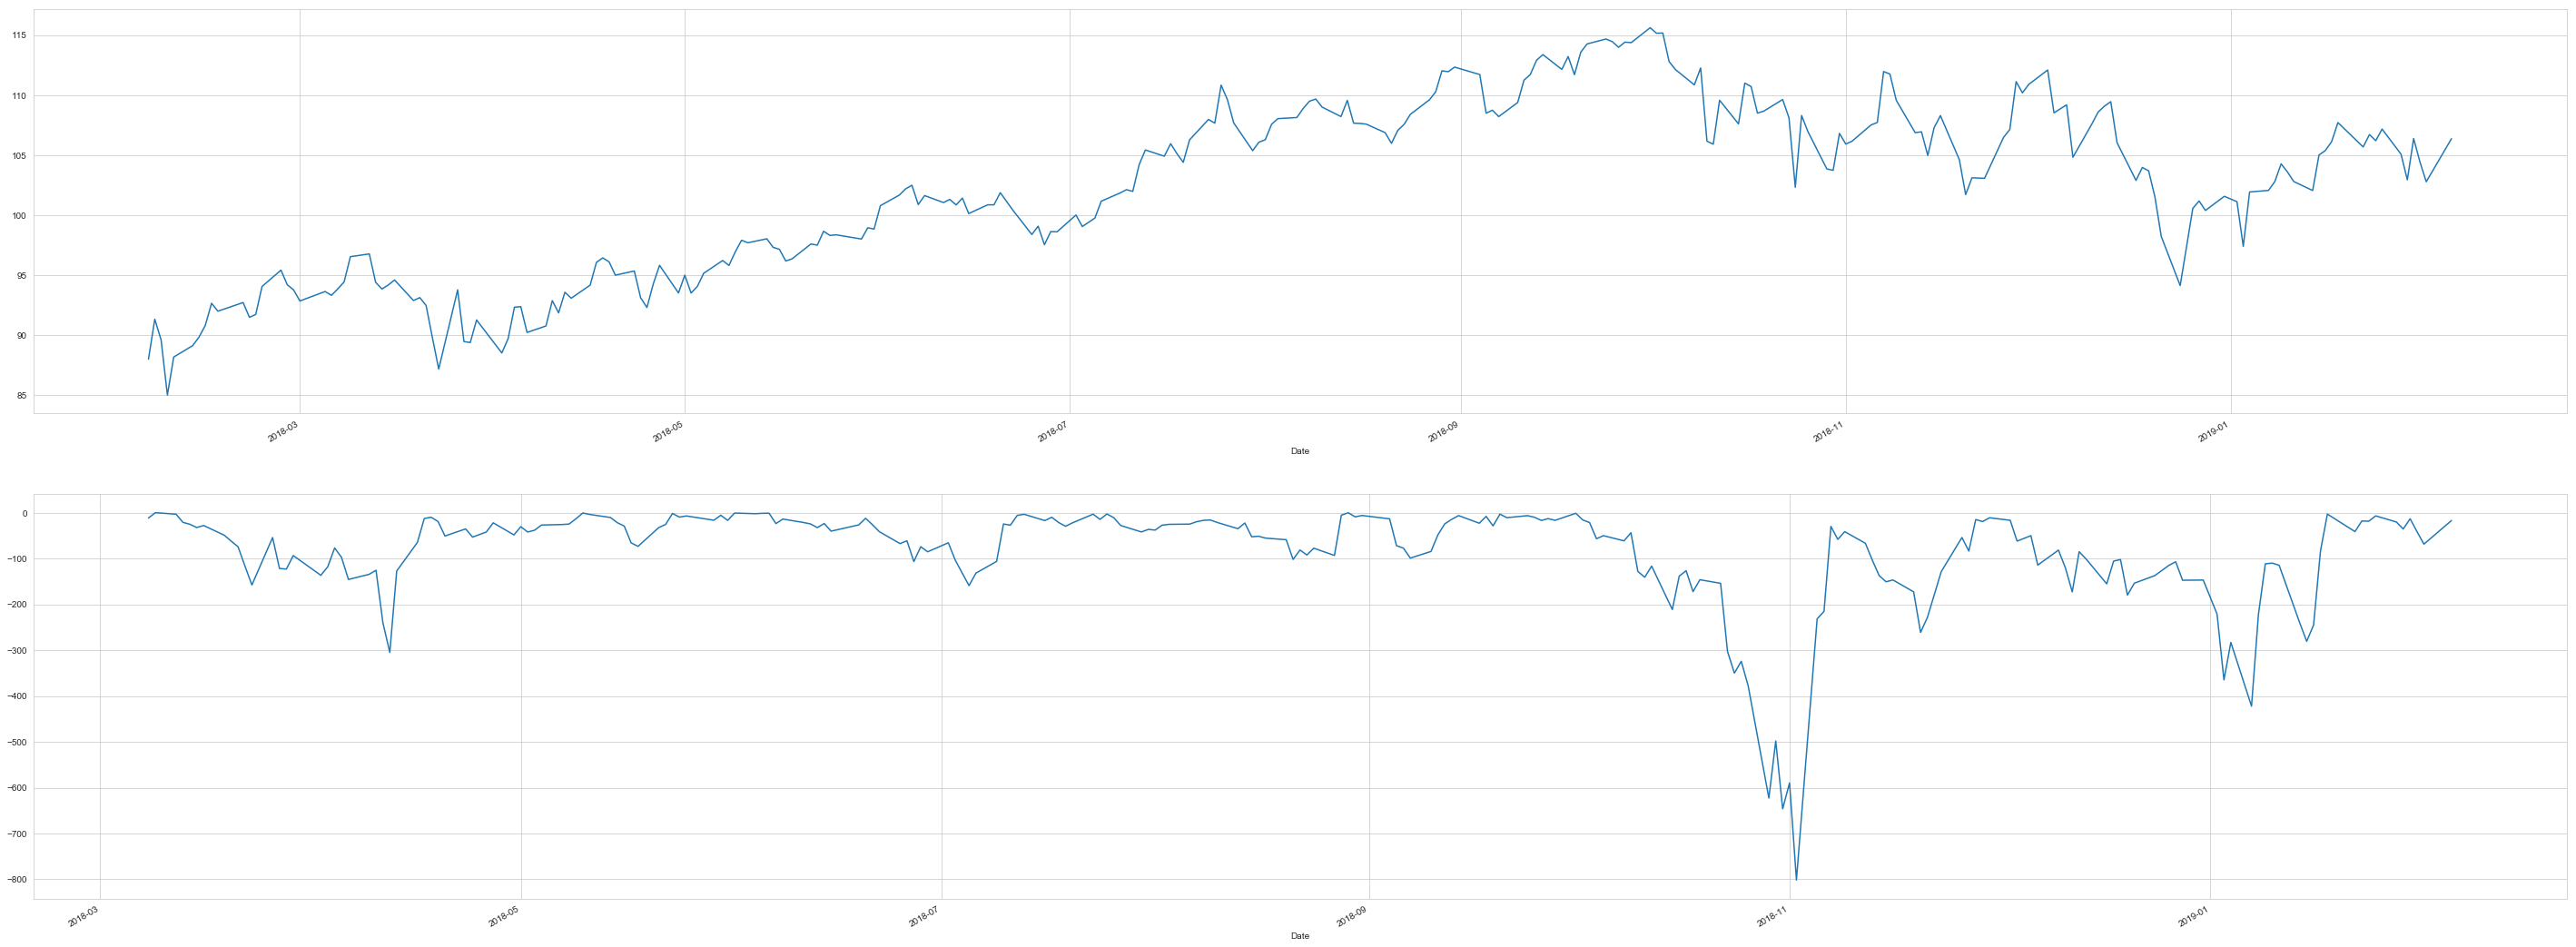

In [123]:
#15 Williams %R
def Highest(n,period):
    high=MSFT['High'][n]
    for i in range(n,n+period+1):
        if MSFT['High'][i] > high:
            high = MSFT['High'][i]
    return high
def Lowest(n,period):
    low=MSFT['Low'][n]
    for i in range(n,period+1):
        if MSFT['Low'][i] < low:
            low = MSFT['Low'][i]
    return low
WilliamsR = np.array([])
WilliamsR = np.append(WilliamsR, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    high=Highest(i,emaPeriod)
    low=Lowest(i,emaPeriod)
    W = ((-100)*(high - MSFT['Close'][i+emaPeriod]))/((high - float(low)))
    WilliamsR = np.append(WilliamsR, W)
MSFT['WilliamsR'] = WilliamsR
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['WilliamsR'].plot(subplots=False,figsize=(50,20))

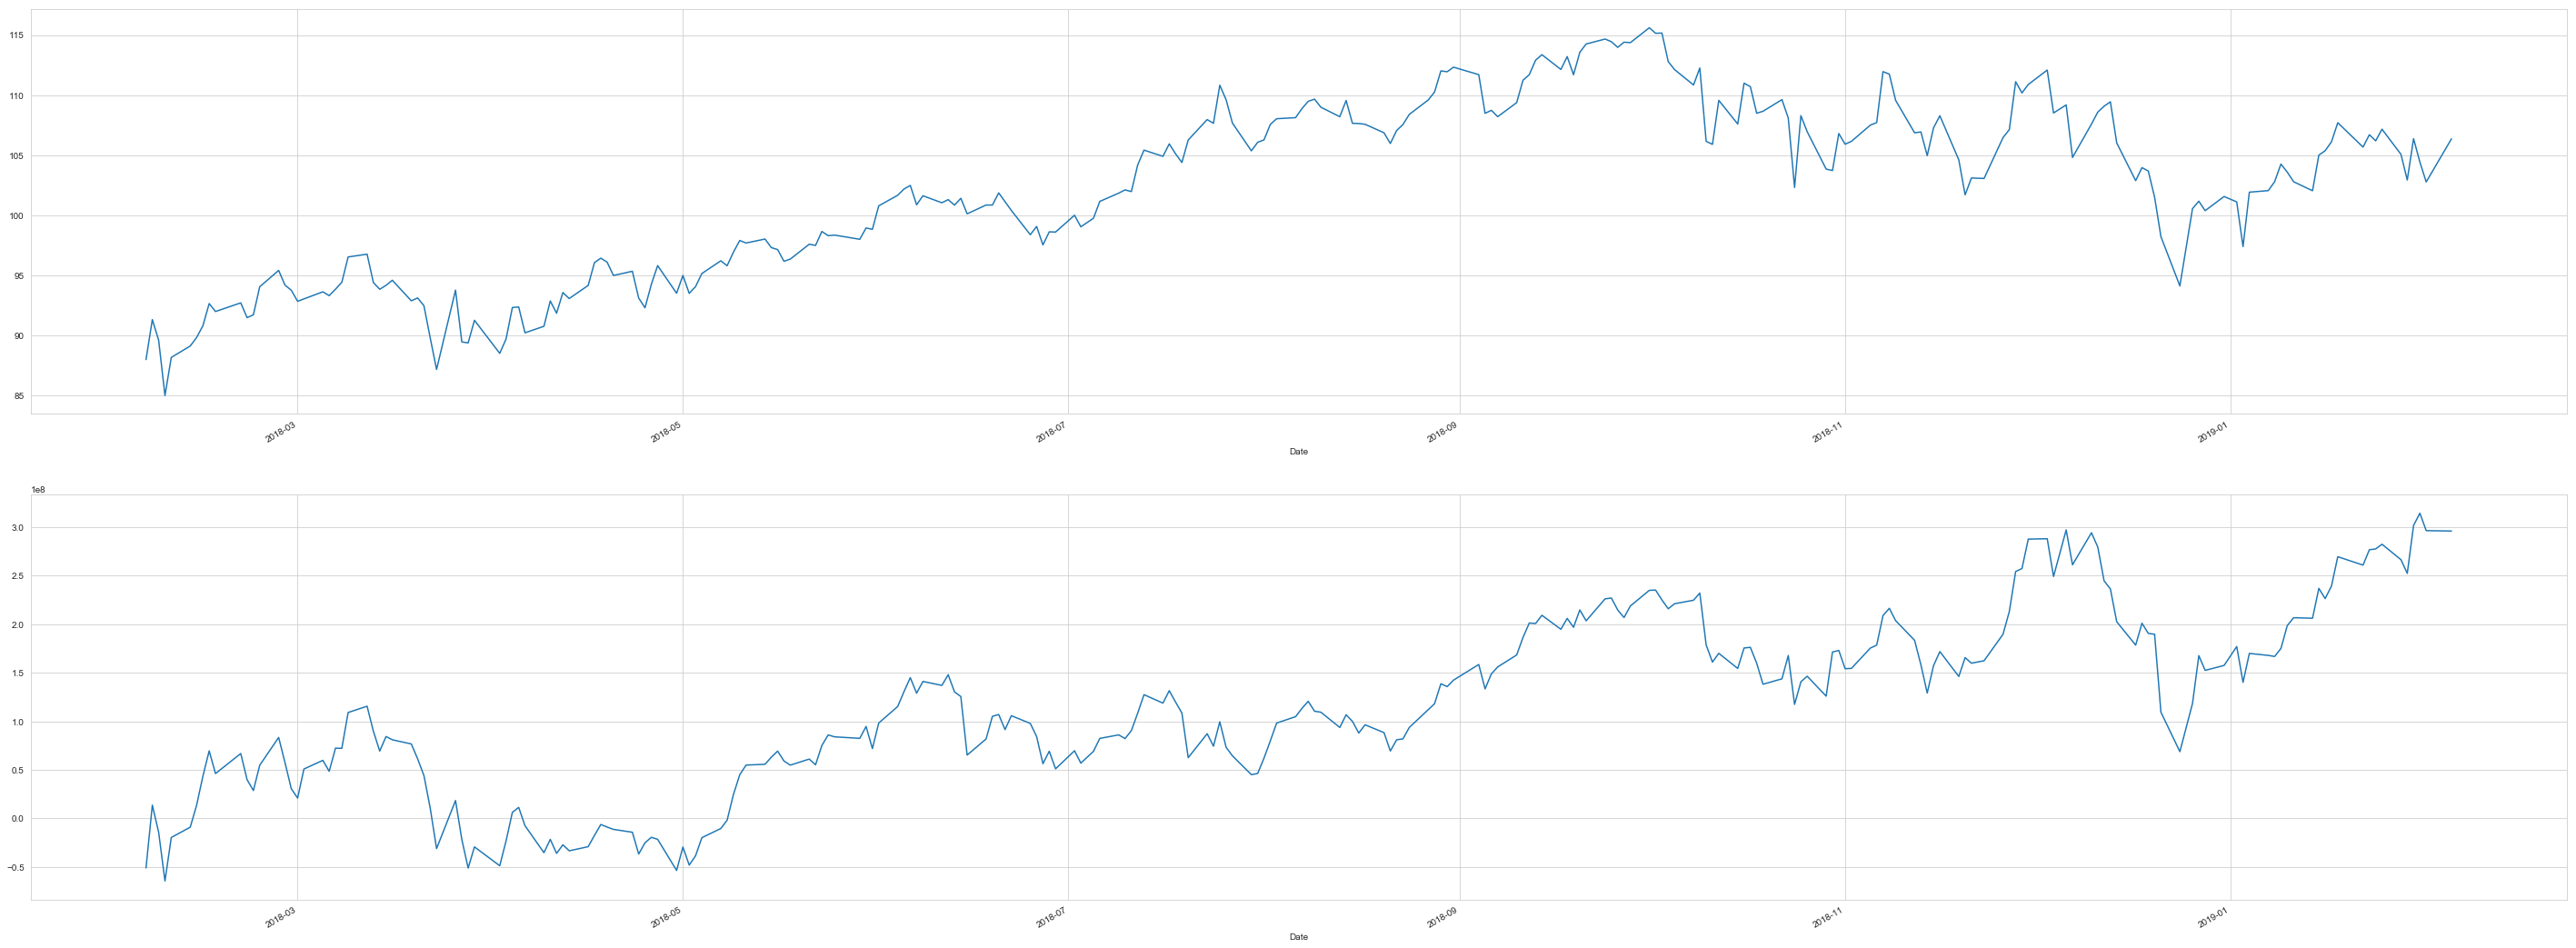

In [130]:
#16  Accumulation Distribution Oscillation (ADO)
MSFT['Multiplier']= (2*MSFT['Close']-MSFT['High']-MSFT['Low'])/(MSFT['High']-MSFT['Low'])
MSFT['MVolume']=MSFT['Multiplier']*MSFT['Volume']
ADL = np.array([])
ADL = np.append(ADL,MSFT['MVolume'][0])
for i in range(1,len(MSFT['Close'])):
    Adl = ADL[i-1] + MSFT['MVolume'][i]
    ADL = np.append(ADL,Adl)
MSFT['ADL'] = ADL
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['ADL'].plot(subplots=False,figsize=(50,20))

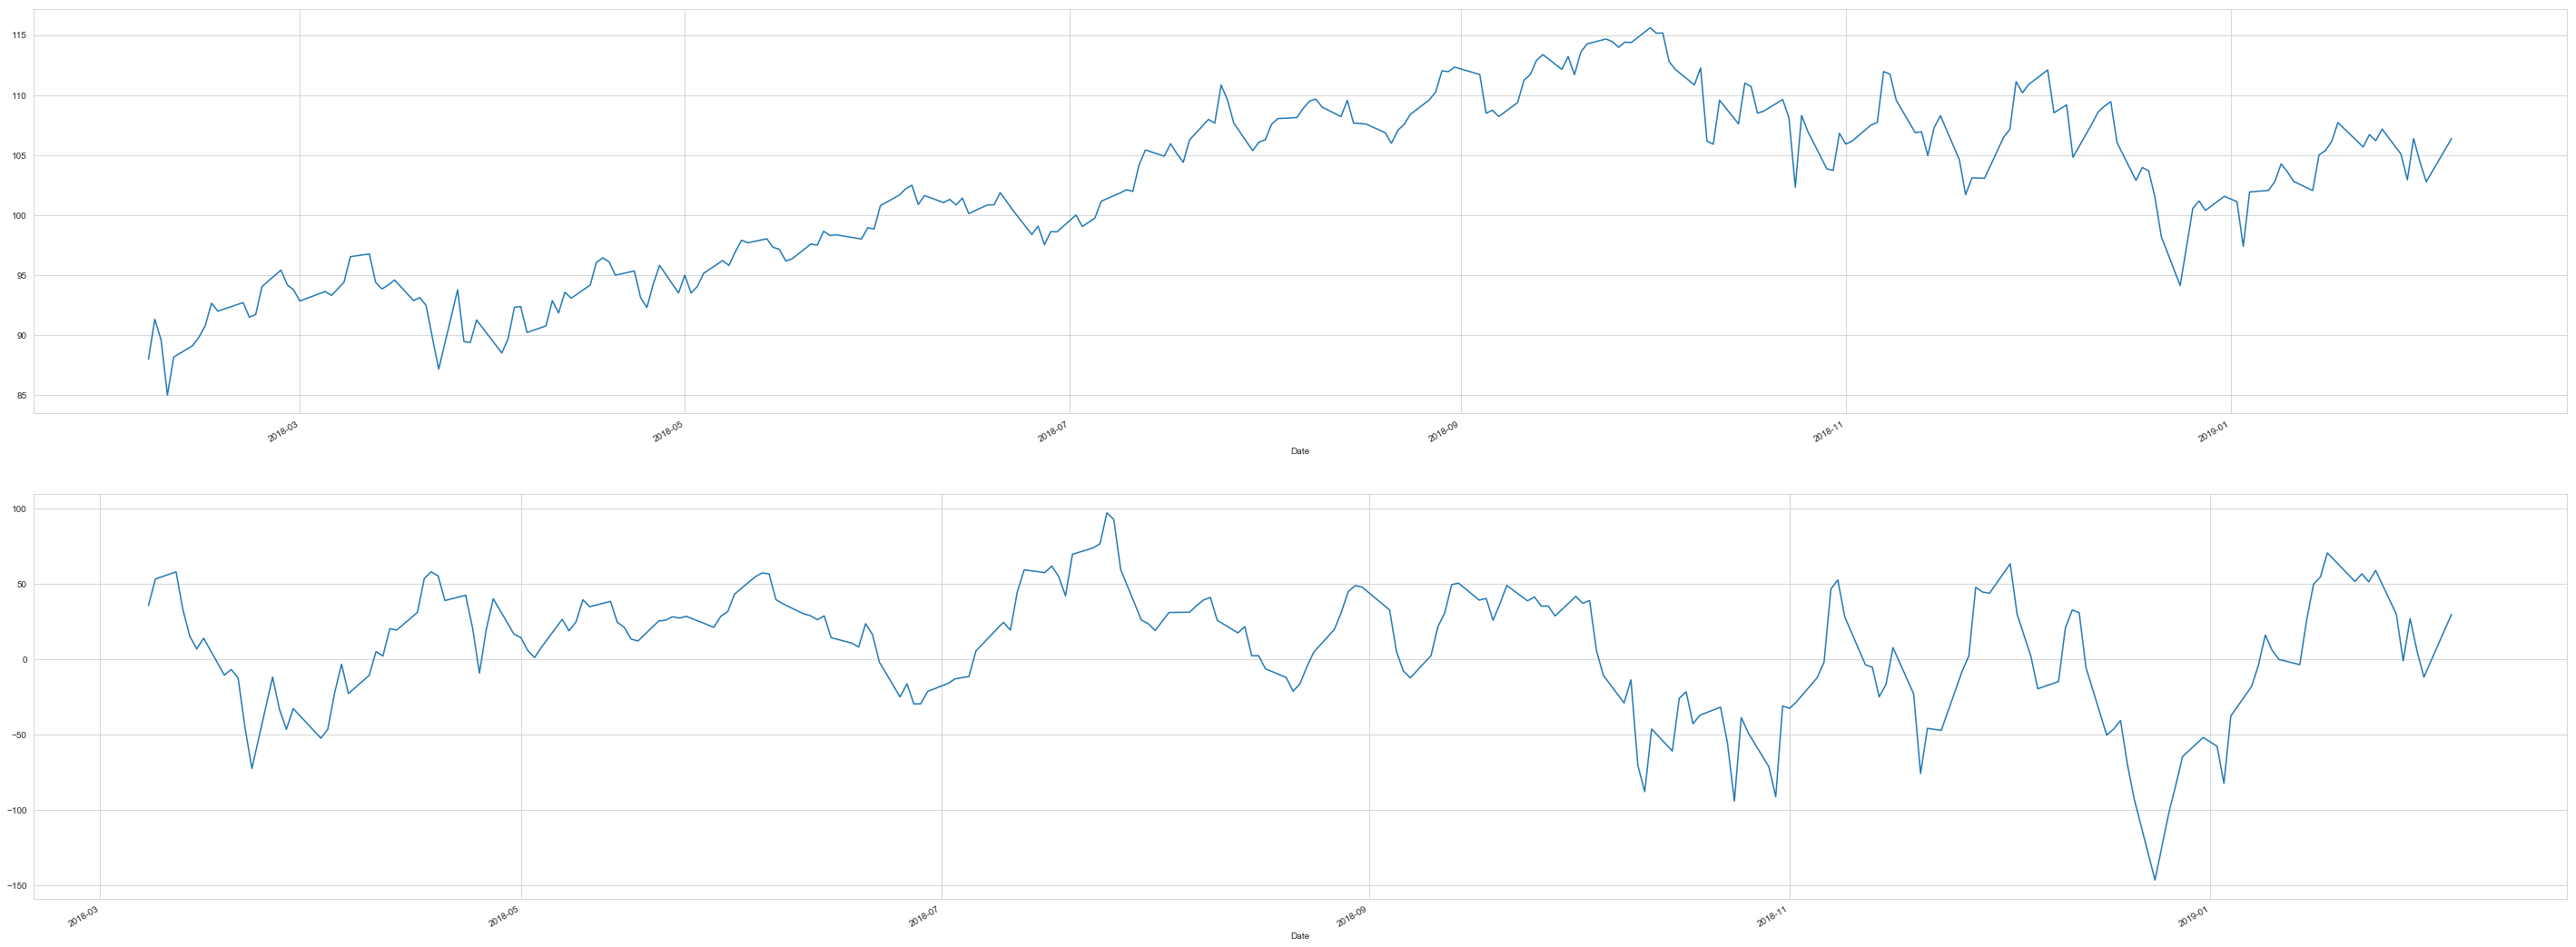

In [138]:
#17 Commodity Channel Index (CCI)
def mad(n,period):
    sum=0
    for i in range(n,n+period+1):
        sum+=abs(MSFT['TP']-MSFT['SMP of TP'])
    return high
MSFT['TP'] = (MSFT['Close']+MSFT['High']+MSFT['Low'])/3
MSFT['SMP of TP'] = MSFT['TP'].rolling(emaPeriod).mean()
MAD = np.array([])
MAD = np.append(MAD,[np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    su = mad(i,emaPeriod)
    MAD = np.append(MAD,su/float(emaPeriod))
MSFT['MAD of TP'] = MAD
MSFT['CCI'] = (MSFT['TP'] - MSFT['SMP of TP'])/(0.015*MSFT['MAD of TP'])
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['CCI'].plot(subplots=False,figsize=(50,20))

In [ ]:
#18 Kaufman's Adaptive Moving Average (KAMA)
V = np.array([])
V = np.append(V,np.nan)
for i in range(1,len(MSFT['Clsoe'])):
    V = np.append(V, MSFT['Close'][i]-MSFT['CLose'][i-1])
